# **Analysis of the Intrusion Detection Evaluation Dataset (CIC-IDS2017)**

[Dataset Link](https://www.unb.ca/cic/datasets/ids-2017.html)

##	Dataset Characteristics and Exploratory Data Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
sns.set(style='darkgrid')
import matplotlib.pyplot as plt

In [ ]:
# Loading the dataset
data1 = pd.read_csv('/content/drive/MyDrive/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv')
data2 = pd.read_csv('/content/drive/MyDrive/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv')
data3 = pd.read_csv('/content/drive/MyDrive/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv')
data4 = pd.read_csv('/content/drive/MyDrive/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')
data5 = pd.read_csv('/content/drive/MyDrive/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv')
data6 = pd.read_csv('/content/drive/MyDrive/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv')
data7 = pd.read_csv('/content/drive/MyDrive/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
data8 = pd.read_csv('/content/drive/MyDrive/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')

In [ ]:
data_list = [data1, data2, data3, data4, data5, data6, data7, data8]

print('Data dimensions: ')
for i, data in enumerate(data_list, start = 1):
  rows, cols = data.shape
  print(f'Data{i} -> {rows} rows, {cols} columns')

Data dimensions: 
Data1 -> 529918 rows, 79 columns
Data2 -> 445909 rows, 79 columns
Data3 -> 692703 rows, 79 columns
Data4 -> 170366 rows, 79 columns
Data5 -> 288602 rows, 79 columns
Data6 -> 191033 rows, 79 columns
Data7 -> 286467 rows, 79 columns
Data8 -> 225745 rows, 79 columns


In [ ]:
data = pd.concat(data_list)
rows, cols = data.shape

print('New dimension:')
print(f'Number of rows: {rows}')
print(f'Number of columns: {cols}')
print(f'Total cells: {rows * cols}')

New dimension:
Number of rows: 2830743
Number of columns: 79
Total cells: 223628697


In [ ]:
# Deleting dataframes after concating to save memory
for d in data_list: del d

In [ ]:
# Renaming the columns by removing leading/trailing whitespace
col_names = {col: col.strip() for col in data.columns}
data.rename(columns = col_names, inplace = True)

In [ ]:
data.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2830743 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Backward Packets       int64  
 4   Total Length of Fwd Packets  int64  
 5   Total Length of Bwd Packets  int64  
 6   Fwd Packet Length Max        int64  
 7   Fwd Packet Length Min        int64  
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        int64  
 11  Bwd Packet Length Min        int64  
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                 int64  
 19  F

In [ ]:
pd.options.display.max_rows = 80

print('Overview of Columns:')
data.describe().transpose()

Overview of Columns:


,count,mean,std,min,25%,50%,75%,max
Destination Port,2830743.0,8.071483e+03,1.828363e+04,0.000000e+00,53.000000,80.000000,4.430000e+02,6.553500e+04
Flow Duration,2830743.0,1.478566e+07,3.365374e+07,-1.300000e+01,155.000000,31316.000000,3.204828e+06,1.200000e+08
Total Fwd Packets,2830743.0,9.361160e+00,7.496728e+02,1.000000e+00,2.000000,2.000000,5.000000e+00,2.197590e+05
Total Backward Packets,2830743.0,1.039377e+01,9.973883e+02,0.000000e+00,1.000000,2.000000,4.000000e+00,2.919220e+05
Total Length of Fwd Packets,2830743.0,5.493024e+02,9.993589e+03,0.000000e+00,12.000000,62.000000,1.870000e+02,1.290000e+07
Total Length of Bwd Packets,2830743.0,1.616264e+04,2.263088e+06,0.000000e+00,0.000000,123.000000,4.820000e+02,6.554530e+08
Fwd Packet Length Max,2830743.0,2.075999e+02,7.171848e+02,0.000000e+00,6.000000,37.000000,8.100000e+01,2.482000e+04
Fwd Packet Length Min,2830743.0,1.871366e+01,6.033935e+01,0.000000e+00,0.000000,2.000000,3.600000e+01,2.325000e+03
Fwd Packet Length Mean,2830743.0,5.820194e+01,1.860912e+02,0.000000e+00,6.000000,34.000000,5.000000e+01,5.940857e+03
Fwd Packet Length Std,2830743.0,6.891013e+01,2.811871e+02,0.000000e+00,0.000000,0.000000,2.616295e+01,7.125597e+03


In [ ]:
pd.options.display.max_columns = 80
data

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49188,4,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,3.000000e+06,5.000000e+05,4.0,0.0,4,4,4,4.0,0.0,4,4,0,0.0,0.0,0,0,0,0,0,0,40,0,5.000000e+05,0.00000,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,49188,1,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,1.200000e+07,2.000000e+06,1.0,0.0,1,1,1,1.0,0.0,1,1,0,0.0,0.0,0,0,0,0,0,0,40,0,2.000000e+06,0.00000,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,49188,1,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,1.200000e+07,2.000000e+06,1.0,0.0,1,1,1,1.0,0.0,1,1,0,0.0,0.0,0,0,0,0,0,0,40,0,2.000000e+06,0.00000,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,49188,1,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,1.200000e+07,2.000000e+06,1.0,0.0,1,1,1,1.0,0.0,1,1,0,0.0,0.0,0,0,0,0,0,0,40,0,2.000000e+06,0.00000,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,49486,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,6.666667e+05,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,6.666667e+05,0.00000,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,245,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,61374,61,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.967213e+05,3.278689e+04,61.0,0.0,61,61,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,1.639344e+04,16393.44262,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,288,253,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225741,61378,72,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.666667e+05,2.777778e+04,72.0,0.0,72,72,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,1.388889e+04,13888.88889,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,288,253,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225742,61375,75,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.600000e+05,2.666667e+04,75.0,0.0,75,75,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,1.333333e+04,13333.33333,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,288,253,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225743,61323,48,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,2.500000e+05,4.166667e+04,48.0,0.0,48,48,48,48.0,0.0,48,48,0,0.0,0.0,0,0,0,0,0,0,40,0,4.166667e+04,0.00000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,4719,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


### 2.2 Data Cleaning









#### Identifying duplicate values


In [ ]:
dups = data[data.duplicated()]
print(f'Number of duplicates: {len(dups)}')

Number of duplicates: 308381


In [ ]:
data.drop_duplicates(inplace = True)
data.shape

(2522362, 79)

#### Identifying missing values


In [ ]:
missing_val = data.isna().sum()
print(missing_val.loc[missing_val > 0])

Flow Bytes/s    353
dtype: int64


In [ ]:
# Checking for infinity values
numeric_cols = data.select_dtypes(include = np.number).columns
inf_count = np.isinf(data[numeric_cols]).sum()
print(inf_count[inf_count > 0])

Flow Bytes/s      1211
Flow Packets/s    1564
dtype: int64


In [ ]:
# Replacing any infinite values (positive or negative) with NaN (not a number)
print(f'Initial missing values: {data.isna().sum().sum()}')

data.replace([np.inf, -np.inf], np.nan, inplace = True)

print(f'Missing values after processing infinite values: {data.isna().sum().sum()}')

Initial missing values: 353
Missing values after processing infinite values: 3128


In [ ]:
missing = data.isna().sum()
print(missing.loc[missing > 0])

Flow Bytes/s      1564
Flow Packets/s    1564
dtype: int64


In [ ]:
# Calculating missing value percentage in the dataset
mis_per = (missing / len(data)) * 100
mis_table = pd.concat([missing, mis_per.round(2)], axis = 1)
mis_table = mis_table.rename(columns = {0 : 'Missing Values', 1 : 'Percentage of Total Values'})

print(mis_table.loc[mis_per > 0])

                Missing Values  Percentage of Total Values
Flow Bytes/s              1564                        0.06
Flow Packets/s            1564                        0.06


#### Visualisation of missing data


#### Dealing with missing values (Columns with missing data)

In [ ]:
med_flow_bytes = data['Flow Bytes/s'].median()
med_flow_packets = data['Flow Packets/s'].median()

print('Median of Flow Bytes/s: ', med_flow_bytes)
print('Median of Flow Packets/s: ', med_flow_packets)

Median of Flow Bytes/s:  3715.0378579999997
Median of Flow Packets/s:  69.742244285


In [ ]:
# Filling missing values with median
data['Flow Bytes/s'].fillna(med_flow_bytes, inplace = True)
data['Flow Packets/s'].fillna(med_flow_packets, inplace = True)

In [ ]:
print('Number of \'Flow Bytes/s\' missing values:', data['Flow Bytes/s'].isna().sum())
print('Number of \'Flow Packets/s\' missing values:', data['Flow Packets/s'].isna().sum())

Number of 'Flow Bytes/s' missing values: 0
Number of 'Flow Packets/s' missing values: 0


## Data Preprocessing

### Preprocessing

In [ ]:
# For improving performance and reduce memory-related errors
old_memory_usage = data.memory_usage().sum() / 1024 ** 2
print(f'Initial memory usage: {old_memory_usage:.2f} MB')
for col in data.columns:
    col_type = data[col].dtype
    if col_type != object:
        c_min = data[col].min()
        c_max = data[col].max()
        # Downcasting float64 to float32
        if str(col_type).find('float') >= 0 and c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
            data[col] = data[col].astype(np.float32)

        # Downcasting int64 to int32
        elif str(col_type).find('int') >= 0 and c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
            data[col] = data[col].astype(np.int32)

new_memory_usage = data.memory_usage().sum() / 1024 ** 2
print(f"Final memory usage: {new_memory_usage:.2f} MB")

Initial memory usage: 1539.53 MB
Final memory usage: 808.25 MB


In [ ]:
# Calculating percentage reduction in memory usage
print(f'Reduced memory usage: {1 - (new_memory_usage / old_memory_usage):.2%}')

Reduced memory usage: 47.50%


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2522362 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int32  
 1   Flow Duration                int32  
 2   Total Fwd Packets            int32  
 3   Total Backward Packets       int32  
 4   Total Length of Fwd Packets  int32  
 5   Total Length of Bwd Packets  int32  
 6   Fwd Packet Length Max        int32  
 7   Fwd Packet Length Min        int32  
 8   Fwd Packet Length Mean       float32
 9   Fwd Packet Length Std        float32
 10  Bwd Packet Length Max        int32  
 11  Bwd Packet Length Min        int32  
 12  Bwd Packet Length Mean       float32
 13  Bwd Packet Length Std        float32
 14  Flow Bytes/s                 float32
 15  Flow Packets/s               float32
 16  Flow IAT Mean                float32
 17  Flow IAT Std                 float32
 18  Flow IAT Max                 int32  
 19  F

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Destination Port,2522362.0,8.704762e+03,1.902507e+04,0.000000e+00,53.000000,80.000000,4.430000e+02,6.553500e+04
Flow Duration,2522362.0,1.658132e+07,3.522426e+07,-1.300000e+01,208.000000,50577.000000,5.329717e+06,1.200000e+08
Total Fwd Packets,2522362.0,1.027627e+01,7.941738e+02,1.000000e+00,2.000000,2.000000,6.000000e+00,2.197590e+05
Total Backward Packets,2522362.0,1.156596e+01,1.056594e+03,0.000000e+00,1.000000,2.000000,5.000000e+00,2.919220e+05
Total Length of Fwd Packets,2522362.0,6.115751e+02,1.058499e+04,0.000000e+00,12.000000,66.000000,3.320000e+02,1.290000e+07
Total Length of Bwd Packets,2522362.0,1.813315e+04,2.397434e+06,0.000000e+00,6.000000,155.000000,9.880000e+02,6.554530e+08
Fwd Packet Length Max,2522362.0,2.310918e+02,7.561625e+02,0.000000e+00,6.000000,40.000000,2.020000e+02,2.482000e+04
Fwd Packet Length Min,2522362.0,1.919464e+01,6.079447e+01,0.000000e+00,0.000000,2.000000,3.700000e+01,2.325000e+03
Fwd Packet Length Mean,2522362.0,6.347013e+01,1.955015e+02,0.000000e+00,6.000000,36.111111,5.200000e+01,5.940857e+03
Fwd Packet Length Std,2522362.0,7.727757e+01,2.967953e+02,0.000000e+00,0.000000,0.000000,7.413914e+01,7.125597e+03


In [ ]:
# Dropping columns with only one unique value
num_unique = data.nunique()
one_variable = num_unique[num_unique == 1]
not_one_variable = num_unique[num_unique > 1].index

dropped_cols = one_variable.index
data = data[not_one_variable]

print('Dropped columns:')
dropped_cols

Dropped columns:


Index(['Bwd PSH Flags', 'Bwd URG Flags', 'Fwd Avg Bytes/Bulk',
       'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk',
       'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate'],
      dtype='object')

In [ ]:
data.shape

(2522362, 71)

In [ ]:
# Columns after removing non variant columns
data.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd URG Flags',
       'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s',
       'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length',
       'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance',
       'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count',

### Applying PCA to reduce dimensions


In [ ]:
# Standardizing the dataset
from sklearn.preprocessing import StandardScaler

features = data.drop('Attack Type', axis = 1)
attacks = data['Attack Type']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
from sklearn.decomposition import IncrementalPCA

size = len(features.columns) // 2
ipca = IncrementalPCA(n_components = size, batch_size = 500)
for batch in np.array_split(scaled_features, len(features) // 500):
    ipca.partial_fit(batch)

print(f'information retained: {sum(ipca.explained_variance_ratio_):.2%}')

information retained: 99.30%


In [ ]:
transformed_features = ipca.transform(scaled_features)
new_data = pd.DataFrame(transformed_features, columns = [f'PC{i+1}' for i in range(size)])
new_data['Attack Type'] = attacks.values

In [ ]:
new_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,Attack Type
0,-2.357605,-0.054980,0.577367,0.734454,3.730371,0.234648,-0.015694,-0.215593,-0.278501,1.087262,0.032711,0.067621,1.638439,0.371324,-0.794797,0.003730,0.069457,0.614933,-0.658005,-0.596658,-0.350690,-0.714309,-1.721585,-0.069528,-0.420207,0.904754,-0.147988,-0.334371,1.487918,-0.163631,-0.219312,-0.004576,0.002609,0.034128,-0.015853,BENIGN
1,-2.883854,-0.069938,0.911321,1.763147,8.846136,0.620454,-0.056858,1.106466,1.906559,-2.756474,-0.950592,-0.843113,6.052571,1.568504,-4.731659,-0.120694,1.313557,1.949344,-0.497494,-0.591938,-0.199933,-0.566894,-5.606576,0.296477,1.603394,0.594120,0.282642,-2.347082,2.238826,-0.640825,-0.367420,0.010520,0.000645,0.125795,-0.190767,BENIGN
2,-2.416928,-0.056683,0.615335,0.850869,4.304213,0.275779,-0.020438,-0.070542,-0.035290,0.664153,-0.076172,-0.033045,2.132309,0.504258,-1.230418,-0.009935,0.206592,0.763981,-0.642472,-0.598090,-0.334834,-0.697290,-2.155998,-0.032073,-0.196749,0.868293,-0.101730,-0.545536,1.572158,-0.213910,-0.234609,-0.003047,0.002402,0.043993,-0.035273,BENIGN
3,-2.884705,-0.069978,0.912183,1.765263,8.851561,0.618717,-0.057028,1.104621,1.906986,-2.752501,-0.950219,-0.842586,6.055982,1.568418,-4.729850,-0.120534,1.312459,1.950124,-0.499796,-0.593895,-0.200827,-0.566254,-5.609324,0.293264,1.602008,0.592174,0.281052,-2.334612,2.239632,-0.638082,-0.366261,0.010372,0.000655,0.125475,-0.190752,BENIGN
4,-1.505248,0.080886,-0.504396,0.290414,-0.539267,0.746103,0.100443,0.732508,-1.145775,-0.563206,-0.043730,-0.207928,-0.433553,0.033402,-0.609130,0.018303,-0.249173,-0.475477,-0.140381,0.113623,-0.114053,0.096071,0.291834,0.385968,-0.255655,-0.689650,-0.599155,0.116353,0.795041,-0.211000,0.042492,-0.014254,0.000957,-0.052009,0.001372,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2522357,-2.270966,-0.048462,0.480012,0.461159,2.163937,-0.144601,-0.016015,-0.777804,-0.908055,2.711084,0.413813,0.405736,0.990244,-0.084219,0.911051,0.011116,-0.030085,0.339254,-0.328302,-0.307958,-0.436224,-1.017082,-0.319116,-0.280794,-0.369498,0.762724,-0.043101,0.787857,0.785667,0.247959,0.036167,-0.017415,0.001898,0.005532,-0.005967,BENIGN
2522358,-2.267921,-0.048377,0.478583,0.457923,2.144121,-0.146620,-0.015946,-0.780613,-0.911196,2.717732,0.416385,0.408586,0.957450,-0.091206,0.928823,0.012636,-0.044514,0.326976,-0.347688,-0.340585,-0.425384,-1.035495,-0.346322,-0.274981,-0.359969,0.758203,-0.041162,0.789232,0.787023,0.249306,0.038001,-0.017559,0.001901,0.005085,-0.006293,BENIGN
2522359,-2.267236,-0.048358,0.478260,0.457172,2.139660,-0.147061,-0.015930,-0.781230,-0.911881,2.719162,0.416950,0.409214,0.950138,-0.092751,0.932744,0.012972,-0.047707,0.324249,-0.351975,-0.347804,-0.422976,-1.039582,-0.352317,-0.273678,-0.357846,0.757177,-0.040728,0.789376,0.787329,0.249559,0.038386,-0.017590,0.001901,0.004988,-0.006363,BENIGN
2522360,-2.102459,-0.041899,0.361540,0.268739,1.795816,0.284755,0.006681,-0.296210,-0.631077,0.966695,0.082003,0.111121,-0.168879,0.134400,-0.233594,0.075831,-0.641996,-0.128213,-0.838009,-0.492747,-0.516140,-0.084907,-0.588280,0.123071,-0.998522,0.312900,-0.372704,1.793470,-0.925189,0.297419,0.128586,-0.006211,0.002178,-0.077697,0.032569,BENIGN


**bold text**## 	Machine Learning Models

### Each of the model descriptions is written in their designated sections.

In [ ]:
# For cross validation
from sklearn.model_selection import cross_val_score

### Creating a Balanced Dataset for Binary Classification

In [ ]:
# Creating a balanced dataset for Binary Classification
normal_traffic = new_data.loc[new_data['Attack Type'] == 'BENIGN']
intrusions = new_data.loc[new_data['Attack Type'] != 'BENIGN']

normal_traffic = normal_traffic.sample(n = len(intrusions), replace = False)

ids_data = pd.concat([intrusions, normal_traffic])
ids_data['Attack Type'] = np.where((ids_data['Attack Type'] == 'BENIGN'), 0, 1)
bc_data = ids_data.sample(n = 15000)

print(bc_data['Attack Type'].value_counts())

0    7520
1    7480
Name: Attack Type, dtype: int64


In [ ]:
# Splitting the data into features (X) and target (y)
from sklearn.model_selection import train_test_split

X_bc = bc_data.drop('Attack Type', axis = 1)
y_bc = bc_data['Attack Type']

X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size = 0.25, random_state = 0)

### Logistic Regression (Binary Classification)

Logistic regression is a type of statistical model used to predict the probability of a binary outcome based on one or more independent variables. It models the relationship between the independent and dependent variable using a sigmoid function to output a probability score between 0 and 1. It's often used in classification tasks where the goal is to determine which of two classes an observation belongs to, such as whether an email is spam or not.
\
\
**Parameters:**\
*max_iter:* this parameter sets the maximum number of iterations for the solver to converge. The default value is set to 100. However, our model could not converge with only 100 iterations so we increased it to our desire.\
\
*C:* This parameter is the regularization strength and controls the trade-off between fitting the training data well and avoiding overfitting. A smaller value of C specifies stronger regularization. We used a lower value for one model and higher value on other to see how the models perform in avoiding overfitting after placing high and low importance respectively.\
\
*solver:* This parameter specifies the algorithm to use in the optimization problem when fitting the logistic regression model. There are several different solver algorithms available such as lbfgs, saga, liblinear and a few more. We went with 'saga' and 'sag' to train our models.\
\
*random_state:* This is to ensure that the output is deterministic and can be reproduced.

In [ ]:
from sklearn.linear_model import LogisticRegression

lr1 = LogisticRegression(max_iter = 10000, C = 0.1, random_state = 0, solver = 'saga')
lr1.fit(X_train_bc, y_train_bc)

cv_lr1 = cross_val_score(lr1, X_train_bc, y_train_bc, cv = 5)
print('Logistic regression Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_lr1)))
print(f'\nMean cross-validation score: {cv_lr1.mean():.2f}')

Logistic regression Model 1

Cross-validation scores: 0.9208888888888889, 0.9253333333333333, 0.9244444444444444, 0.9124444444444444, 0.9275555555555556

Mean cross-validation score: 0.92


In [ ]:
print('Logistic Regression Model 1 coefficients:')
print(*lr1.coef_, sep = ', ')
print('\nLogistic Regression Model 1 intercept:', *lr1.intercept_)

Logistic Regression Model 1 coefficients:
[ 0.4076785  -0.15294146 -0.37387658 -1.60731052  0.54149465  0.95826783
  0.02296954  0.22010439 -0.34777453  0.15411315 -0.01540754  0.06451557
 -0.13631169  0.37178786  0.06727175 -0.01237865 -0.05259885 -0.52612165
 -0.47937894  0.51416051 -0.53903214 -0.42639426  0.86410629  1.33530927
  0.18303433 -1.37210851 -0.83020476 -0.19329263 -0.74016406 -0.08099044
  1.10161251 -0.05301103 -0.00461001  0.51311757 -0.75195947]

Logistic Regression Model 1 intercept: -2.350522949161269


In [ ]:
lr2 = LogisticRegression(max_iter = 15000, solver = 'sag', C = 100, random_state = 0)
lr2.fit(X_train_bc, y_train_bc)

cv_lr2 = cross_val_score(lr2, X_train_bc, y_train_bc, cv = 5)
print('Logistic regression Model 2')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_lr2)))
print(f'\nMean cross-validation score: {cv_lr2.mean():.2f}')

Logistic regression Model 2

Cross-validation scores: 0.9248888888888889, 0.9324444444444444, 0.9244444444444444, 0.9137777777777778, 0.9302222222222222

Mean cross-validation score: 0.93


In [ ]:
print('Logistic Regression Model 2 coefficients:')
print(*lr2.coef_, sep = ', ')
print('\nLogistic Regression Model 2 intercept:', *lr2.intercept_)

Logistic Regression Model 2 coefficients:
[ 0.43879622 -0.15488779 -0.43956471 -2.05010021  0.68914222  1.20878894
  0.02468792  0.31007483 -0.33921983  0.14790221 -0.02425145  0.07478767
 -0.13930122  0.72309854  0.2589199  -0.02314923 -0.02326866 -0.70326205
 -0.52546902  0.56050167 -0.56797027 -0.53837039  0.91056675  1.66221034
  0.14553171 -1.61445135 -1.13495246 -0.25189459 -0.95750931 -0.06190777
  1.48793393 -0.07811015 -0.00621526  0.83865157 -1.07177553]

Logistic Regression Model 2 intercept: -2.9620244722035673


### Support Vector Machine (Binary Classification)

Support Vector Machine (SVM) is a type of supervised machine learning algorithm used for classification and regression analysis. It works by finding a hyperplane in a high-dimensional space that best separates the data points into different classes.
\
\
**Parameters:**\
*kernel:* The kernel parameter specifies the type of kernel function to use. In this case, we have used rbf and poly kernel.\
\
*C:* The C parameter controls the trade-off between maximizing the margin and minimizing the classification error.\
\
*gamma:* The gamma parameter is a hyperparameter that determines the influence of a single training example on the decision boundary.\
\
*random_state:* This is to ensure that the output is deterministic and can be reproduced.

In [ ]:
from sklearn.svm import SVC

svm1 = SVC(kernel = 'poly', C = 1, random_state = 0, probability = True)
svm1.fit(X_train_bc, y_train_bc)

cv_svm1 = cross_val_score(svm1, X_train_bc, y_train_bc, cv = 5)
print('Support Vector Machine Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_svm1)))
print(f'\nMean cross-validation score: {cv_svm1.mean():.2f}')

Support Vector Machine Model 1

Cross-validation scores: 0.816, 0.8986666666666666, 0.808, 0.8057777777777778, 0.8213333333333334

Mean cross-validation score: 0.83


In [ ]:
svm2 = SVC(kernel = 'rbf', C = 1, gamma = 0.1, random_state = 0, probability = True)
svm2.fit(X_train_bc, y_train_bc)

cv_svm2 = cross_val_score(svm2, X_train_bc, y_train_bc, cv = 5)
print('Support Vector Machine Model 2')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_svm2)))
print(f'\nMean cross-validation score: {cv_svm2.mean():.2f}')

Support Vector Machine Model 2

Cross-validation scores: 0.9608888888888889, 0.9555555555555556, 0.9626666666666667, 0.9608888888888889, 0.9671111111111111

Mean cross-validation score: 0.96


In [ ]:
print('SVM Model 1 intercept:', *svm1.intercept_)
print('SVM Model 2 intercept:', *svm2.intercept_)

SVM Model 1 intercept: -0.8702937259202593
SVM Model 2 intercept: -0.42024981543969453


**We did not use the linear kernel. Hence no coefficients.**

### Creating a Balanced Dataset for Multi-class Classification

In [ ]:
new_data['Attack Type'].value_counts()

BENIGN          2096484
DoS              193748
DDoS             128016
Port Scan         90819
Brute Force        9152
Web Attack         2143
Bot                1953
Infiltration         36
Heartbleed           11
Name: Attack Type, dtype: int64

In [ ]:
class_counts = new_data['Attack Type'].value_counts()
selected_classes = class_counts[class_counts > 1950]
class_names = selected_classes.index
selected = new_data[new_data['Attack Type'].isin(class_names)]

dfs = []
for name in class_names:
  df = selected[selected['Attack Type'] == name]
  if len(df) > 2500:
    df = df.sample(n = 5000, random_state = 0)

  dfs.append(df)

df = pd.concat(dfs, ignore_index = True)
df['Attack Type'].value_counts()

BENIGN         5000
DoS            5000
DDoS           5000
Port Scan      5000
Brute Force    5000
Web Attack     2143
Bot            1953
Name: Attack Type, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

X = df.drop('Attack Type', axis=1)
y = df['Attack Type']

smote = SMOTE(sampling_strategy='auto', random_state=0)
X_upsampled, y_upsampled = smote.fit_resample(X, y)

blnc_data = pd.DataFrame(X_upsampled)
blnc_data['Attack Type'] = y_upsampled
blnc_data = blnc_data.sample(frac=1)

blnc_data['Attack Type'].value_counts()

DoS            5000
Port Scan      5000
Bot            5000
Brute Force    5000
BENIGN         5000
Web Attack     5000
DDoS           5000
Name: Attack Type, dtype: int64

In [ ]:
features = blnc_data.drop('Attack Type', axis = 1)
labels = blnc_data['Attack Type']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.25, random_state = 0)

### Random Forest Classifier

Random Forest is an ensemble learning method that combines multiple decision trees to improve the accuracy and generalization performance of the model. The basic idea behind random forests is to fit multiple decision trees on random subsets of the training data and average their predictions to reduce overfitting and improve generalization performance.
\
\
**Parameters:**\
*n_estimators:* This parameter specifies the number of decision trees to fit in the random forest.\
\
*max_depth:* This parameter specifies the maximum depth of each decision tree in the random forest. A deeper tree can capture more complex interactions in the data. In our case, this parameter played a major role getting better results.\
\
*max_features:* This parameter specifies the number of features to consider when looking for the best split in each tree. We trained the first model taking all the features into account an dfor the second one, we used only 20 features.\
\
*random_state:* As mentioned earliar, this is to ensure that the output is deterministic and can be reproduced.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf1 = RandomForestClassifier(n_estimators = 10, max_depth = 6, max_features = None, random_state = 0)
rf1.fit(X_train, y_train)

cv_rf1 = cross_val_score(rf1, X_train, y_train, cv = 5)
print('Random Forest Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_rf1)))
print(f'\nMean cross-validation score: {cv_rf1.mean():.2f}')

Random Forest Model 1

Cross-validation scores: 0.9619047619047619, 0.9615238095238096, 0.9638095238095238, 0.9544761904761905, 0.9575238095238096

Mean cross-validation score: 0.96


In [ ]:
rf2 = RandomForestClassifier(n_estimators = 15, max_depth = 8, max_features = 20, random_state = 0)
rf2.fit(X_train, y_train)

cv_rf2 = cross_val_score(rf2, X_train, y_train, cv = 5)
print('Random Forest Model 2')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_rf2)))
print(f'\nMean cross-validation score: {cv_rf2.mean():.2f}')

Random Forest Model 2

Cross-validation scores: 0.9807619047619047, 0.9832380952380952, 0.9815238095238096, 0.9780952380952381, 0.9811428571428571

Mean cross-validation score: 0.98


### Decision Tree Classifier

A decision tree is a type of algorithm used in machine learning for both classification and regression tasks. The algorithm works by recursively splitting the data into smaller subsets based on the values of the input features until a stopping criterion is met. In our case, it's the maximum depth of the tree.
\
\
**Parameters:**\
*max_depth:* This parameter specifies the maximum depth of the tree. A deeper tree can capture more complex interactions in the data but can be computationally expensive. We started with a small depth and later increased it.


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt1 = DecisionTreeClassifier(max_depth = 6)
dt1.fit(X_train, y_train)

cv_dt1 = cross_val_score(dt1, X_train, y_train, cv = 5)
print('Decision Tree Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_dt1)))
print(f'\nMean cross-validation score: {cv_dt1.mean():.2f}')

Decision Tree Model 1

Cross-validation scores: 0.9476190476190476, 0.9474285714285714, 0.9485714285714286, 0.9527619047619048, 0.948

Mean cross-validation score: 0.95


In [ ]:
dt2 = DecisionTreeClassifier(max_depth = 8)
dt2.fit(X_train, y_train)

cv_dt2 = cross_val_score(dt2, X_train, y_train, cv = 5)
print('Decision Tree Model 2')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_dt2)))
print(f'\nMean cross-validation score: {cv_dt2.mean():.2f}')

Decision Tree Model 2

Cross-validation scores: 0.9678095238095238, 0.9718095238095238, 0.9702857142857143, 0.976, 0.9761904761904762

Mean cross-validation score: 0.97


### K Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn1 = KNeighborsClassifier(n_neighbors = 16)
knn1.fit(X_train, y_train)

cv_knn1 = cross_val_score(knn1, X_train, y_train, cv = 5)
print('K Nearest Neighbors Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_knn1)))
print(f'\nMean cross-validation score: {cv_knn1.mean():.2f}')

K Nearest Neighbors Model 1

Cross-validation scores: 0.9742857142857143, 0.975047619047619, 0.9725714285714285, 0.9735238095238096, 0.9746666666666667

Mean cross-validation score: 0.97


In [ ]:
knn2 = KNeighborsClassifier(n_neighbors = 8)
knn2.fit(X_train, y_train)

cv_knn2 = cross_val_score(knn2, X_train, y_train, cv = 5)
print('K Nearest Neighbors Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_knn2)))
print(f'\nMean cross-validation score: {cv_knn2.mean():.2f}')

K Nearest Neighbors Model 1

Cross-validation scores: 0.9782857142857143, 0.9801904761904762, 0.9786666666666667, 0.9780952380952381, 0.9813333333333333

Mean cross-validation score: 0.98


## 5.	Performance Evaluation and Discussion

In [ ]:
# Importing necessary functions
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report, \
 roc_auc_score, roc_curve, auc, precision_recall_curve

### Logistic Regression Models Comparison

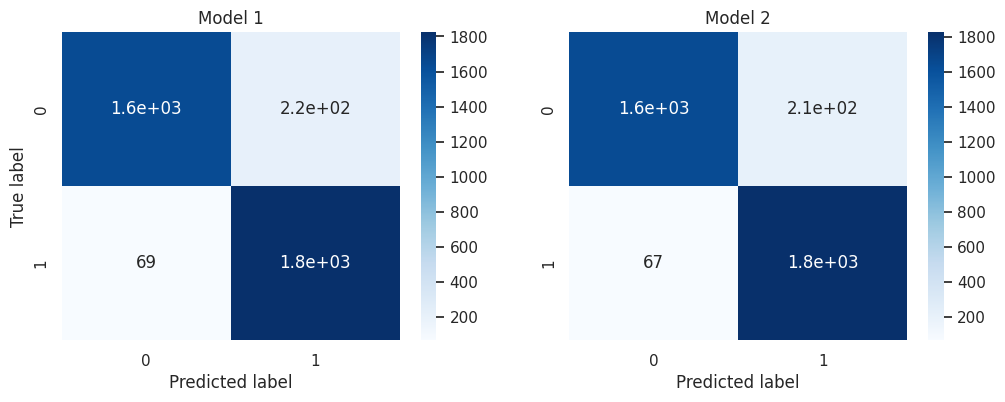

In [ ]:
y_pred_lr1 = lr1.predict(X_test_bc)
y_pred_lr2 = lr2.predict(X_test_bc)

conf_matrix_model1 = confusion_matrix(y_test_bc, y_pred_lr1)
conf_matrix_model2 = confusion_matrix(y_test_bc, y_pred_lr2)

fig, axs = plt.subplots(1, 2, figsize = (12, 4))

sns.heatmap(conf_matrix_model1, annot = True, cmap = 'Blues', ax = axs[0])
axs[0].set_title('Model 1')

sns.heatmap(conf_matrix_model2, annot = True, cmap = 'Blues', ax = axs[1])
axs[1].set_title('Model 2')

axs[0].set_xlabel('Predicted label')
axs[0].set_ylabel('True label')
axs[1].set_xlabel('Predicted label')
plt.show()

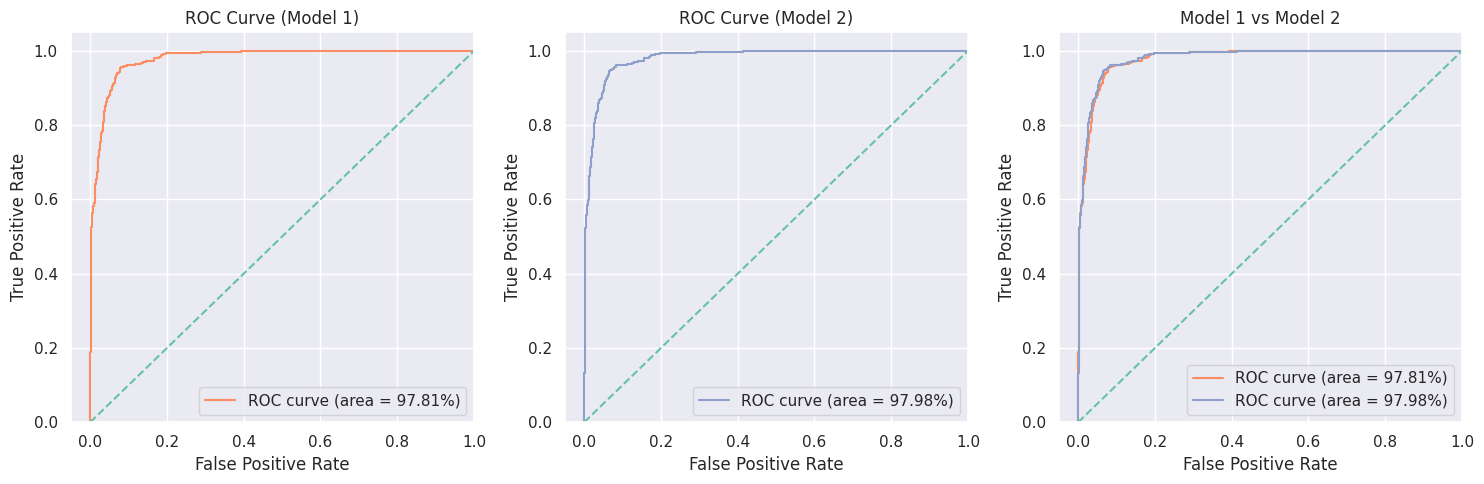

In [ ]:
y_prob_lr1 = lr1.predict_proba(X_test_bc)[:,1]
y_prob_lr2 = lr2.predict_proba(X_test_bc)[:,1]

fpr1, tpr1, _ = roc_curve(y_test_bc, y_prob_lr1)
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(y_test_bc, y_prob_lr2)
roc_auc2 = auc(fpr2, tpr2)

colors = sns.color_palette('Set2', n_colors = 3)
fig, axes = plt.subplots(1, 3, figsize = (15, 5))

axes[0].plot(fpr1, tpr1, label = f'ROC curve (area = {roc_auc1:.2%})', color = colors[1])
axes[0].plot([0, 1], [0, 1], color = colors[0], linestyle = '--')
axes[0].set_xlim([-0.05, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve (Model 1)')
axes[0].legend(loc = 'lower right')

axes[1].plot(fpr2, tpr2, label = f'ROC curve (area = {roc_auc2:.2%})', color = colors[2])
axes[1].plot([0, 1], [0, 1], color = colors[0], linestyle = '--')
axes[1].set_xlim([-0.05, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve (Model 2)')
axes[1].legend(loc = 'lower right')

axes[2].plot(fpr1, tpr1, label = f'ROC curve (area = {roc_auc1:.2%})', color = colors[1])
axes[2].plot(fpr2, tpr2, label = f'ROC curve (area = {roc_auc2:.2%})', color = colors[2])
axes[2].plot([0, 1], [0, 1], color = colors[0], linestyle = '--')
axes[2].set_xlim([-0.05, 1.0])
axes[2].set_ylim([0.0, 1.05])
axes[2].set_xlabel('False Positive Rate')
axes[2].set_ylabel('True Positive Rate')
axes[2].set_title('Model 1 vs Model 2')
axes[2].legend(loc = 'lower right')

plt.tight_layout()
plt.show()

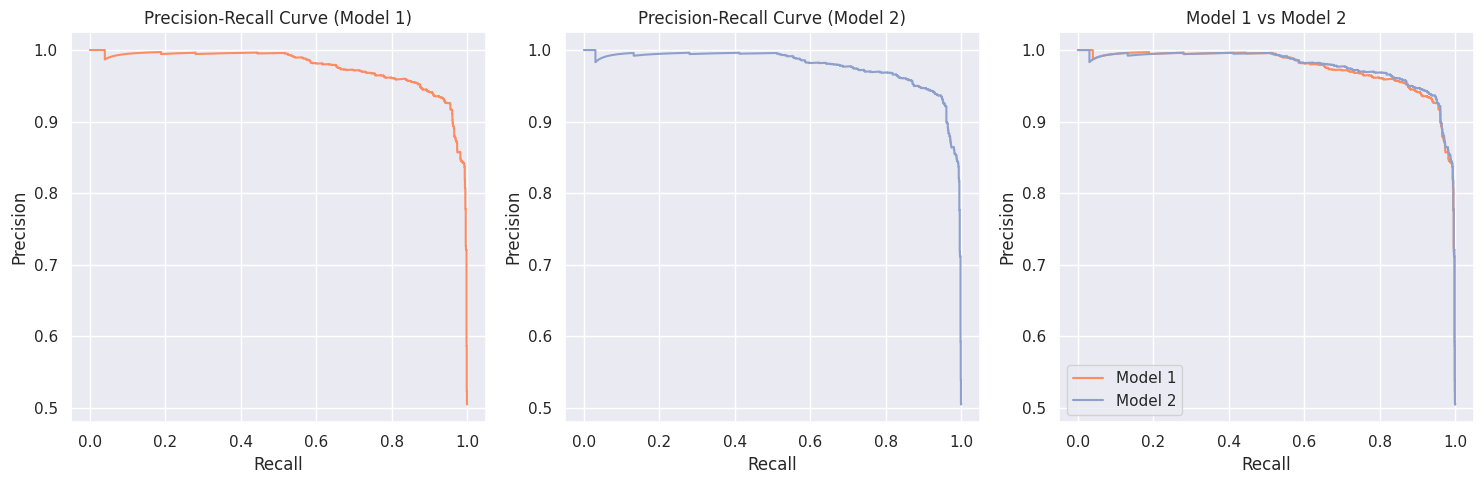

In [ ]:
precision1, recall1, threshold1 = precision_recall_curve(y_test_bc, y_prob_lr1)
precision2, recall2, threshold2 = precision_recall_curve(y_test_bc, y_prob_lr2)

fig, axs = plt.subplots(1, 3, figsize = (15, 5))

axs[0].plot(recall1, precision1, color = colors[1], label = 'Model 1')
axs[0].set_xlabel('Recall')
axs[0].set_ylabel('Precision')
axs[0].set_title('Precision-Recall Curve (Model 1)')

axs[1].plot(recall2, precision2, color = colors[2], label = 'Model 2')
axs[1].set_xlabel('Recall')
axs[1].set_ylabel('Precision')
axs[1].set_title('Precision-Recall Curve (Model 2)')

axs[2].plot(recall1, precision1, color = colors[1], label = 'Model 1')
axs[2].plot(recall2, precision2, color = colors[2], label = 'Model 2')
axs[2].set_xlabel('Recall')
axs[2].set_ylabel('Precision')
axs[2].set_title('Model 1 vs Model 2')
axs[2].legend(loc = 'lower left')

plt.tight_layout()
plt.show()

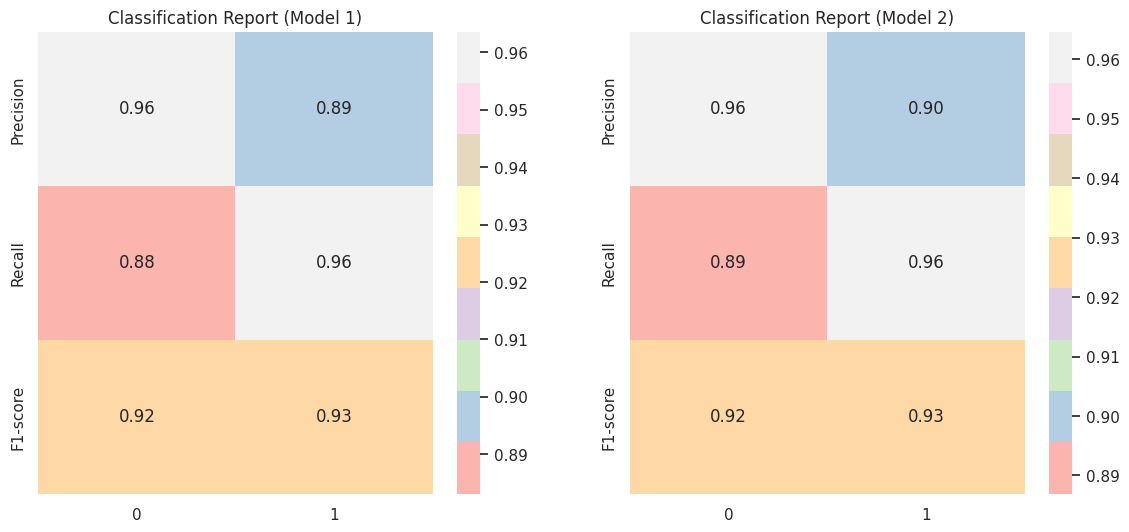

In [ ]:
target_names = lr1.classes_
metrics1 = classification_report(y_true = y_test_bc, y_pred = y_pred_lr1, target_names = target_names, output_dict = True)
precision1 = [metrics1[target_name]['precision'] for target_name in target_names]
recall1 = [metrics1[target_name]['recall'] for target_name in target_names]
f1_score1 = [metrics1[target_name]['f1-score'] for target_name in target_names]

metrics2 = classification_report(y_true = y_test_bc, y_pred = y_pred_lr2, target_names = target_names, output_dict = True)
precision2 = [metrics2[target_name]['precision'] for target_name in target_names]
recall2 = [metrics2[target_name]['recall'] for target_name in target_names]
f1_score2 = [metrics2[target_name]['f1-score'] for target_name in target_names]

data1 = np.array([precision1, recall1, f1_score1])
data2 = np.array([precision2, recall2, f1_score2])
rows = ['Precision', 'Recall', 'F1-score']

fig, axs = plt.subplots(1, 2, figsize = (14, 6))
sns.heatmap(data1, cmap='Pastel1', annot = True, fmt='.2f', xticklabels = target_names, yticklabels = rows, ax = axs[0])
sns.heatmap(data2, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[1])
axs[0].set_title('Classification Report (Model 1)')
axs[1].set_title('Classification Report (Model 2)')
plt.show()

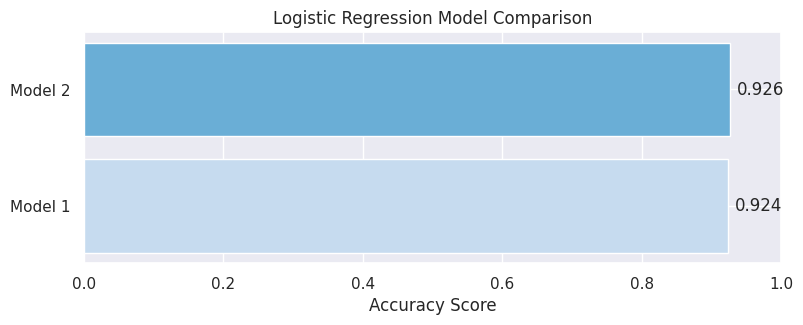

In [ ]:
palette = sns.color_palette('Blues', n_colors = 3)

acc1 = accuracy_score(y_pred_lr1, y_test_bc)
acc2 = accuracy_score(y_pred_lr2, y_test_bc)

labels = ['Model 1', 'Model 2']
scores = [acc1, acc2]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Accuracy Score')
ax.set_title('Logistic Regression Model Comparison')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

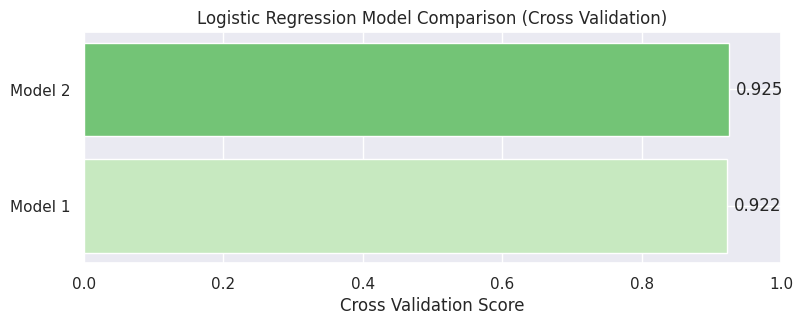

In [ ]:
palette = sns.color_palette('Greens', n_colors = 3)

labels = ['Model 1', 'Model 2']
scores = [cv_lr1.mean(), cv_lr2.mean()]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Cross Validation Score')
ax.set_title('Logistic Regression Model Comparison (Cross Validation)')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

### Support Vector Machine Models Comparison

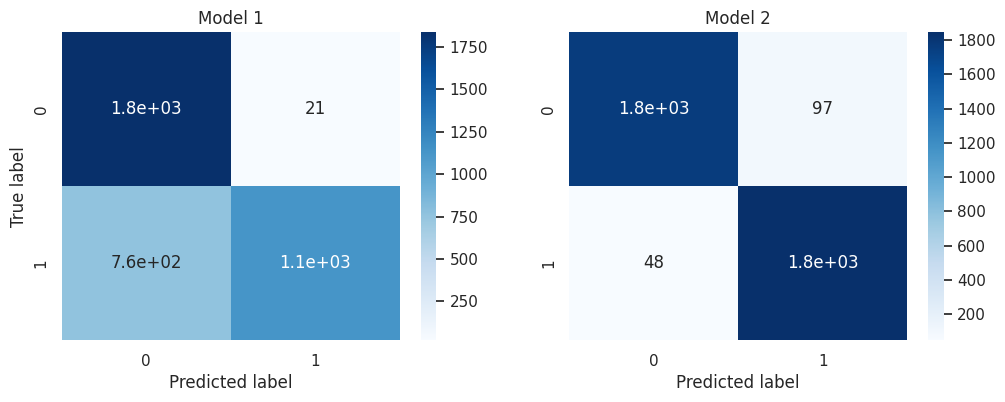

In [ ]:
y_pred_svm1 = svm1.predict(X_test_bc)
y_pred_svm2 = svm2.predict(X_test_bc)

conf_matrix_model1 = confusion_matrix(y_test_bc, y_pred_svm1)
conf_matrix_model2 = confusion_matrix(y_test_bc, y_pred_svm2)

fig, axs = plt.subplots(1, 2, figsize = (12, 4))

sns.heatmap(conf_matrix_model1, annot = True, cmap = 'Blues', ax = axs[0])
axs[0].set_title('Model 1')

sns.heatmap(conf_matrix_model2, annot = True, cmap = 'Blues', ax = axs[1])
axs[1].set_title('Model 2')

axs[0].set_xlabel('Predicted label')
axs[0].set_ylabel('True label')
axs[1].set_xlabel('Predicted label')
plt.show()

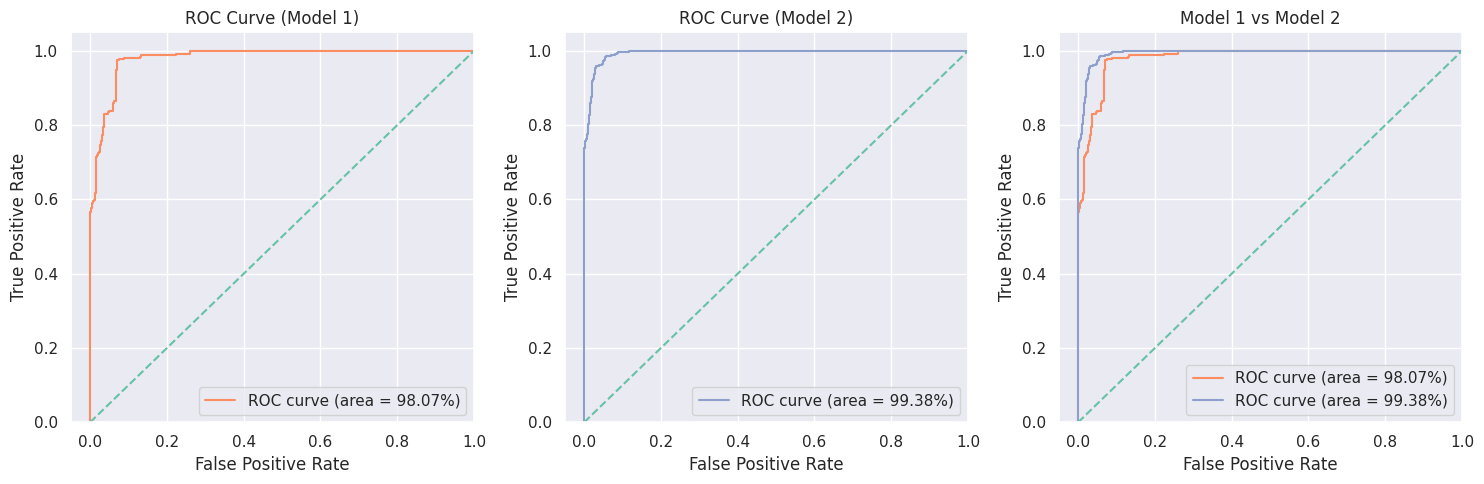

In [ ]:
y_prob_svm1 = svm1.predict_proba(X_test_bc)[:,1]
y_prob_svm2 = svm2.predict_proba(X_test_bc)[:,1]

fpr1, tpr1, _ = roc_curve(y_test_bc, y_prob_svm1)
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(y_test_bc, y_prob_svm2)
roc_auc2 = auc(fpr2, tpr2)

fig, axes = plt.subplots(1, 3, figsize = (15, 5))

axes[0].plot(fpr1, tpr1, label = f'ROC curve (area = {roc_auc1:.2%})', color = colors[1])
axes[0].plot([0, 1], [0, 1], color = colors[0], linestyle = '--')
axes[0].set_xlim([-0.05, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve (Model 1)')
axes[0].legend(loc = 'lower right')

axes[1].plot(fpr2, tpr2, label = f'ROC curve (area = {roc_auc2:.2%})', color = colors[2])
axes[1].plot([0, 1], [0, 1], color = colors[0], linestyle = '--')
axes[1].set_xlim([-0.05, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve (Model 2)')
axes[1].legend(loc = 'lower right')

axes[2].plot(fpr1, tpr1, label = f'ROC curve (area = {roc_auc1:.2%})', color = colors[1])
axes[2].plot(fpr2, tpr2, label = f'ROC curve (area = {roc_auc2:.2%})', color = colors[2])
axes[2].plot([0, 1], [0, 1], color = colors[0], linestyle = '--')
axes[2].set_xlim([-0.05, 1.0])
axes[2].set_ylim([0.0, 1.05])
axes[2].set_xlabel('False Positive Rate')
axes[2].set_ylabel('True Positive Rate')
axes[2].set_title('Model 1 vs Model 2')
axes[2].legend(loc = 'lower right')

plt.tight_layout()
plt.show()

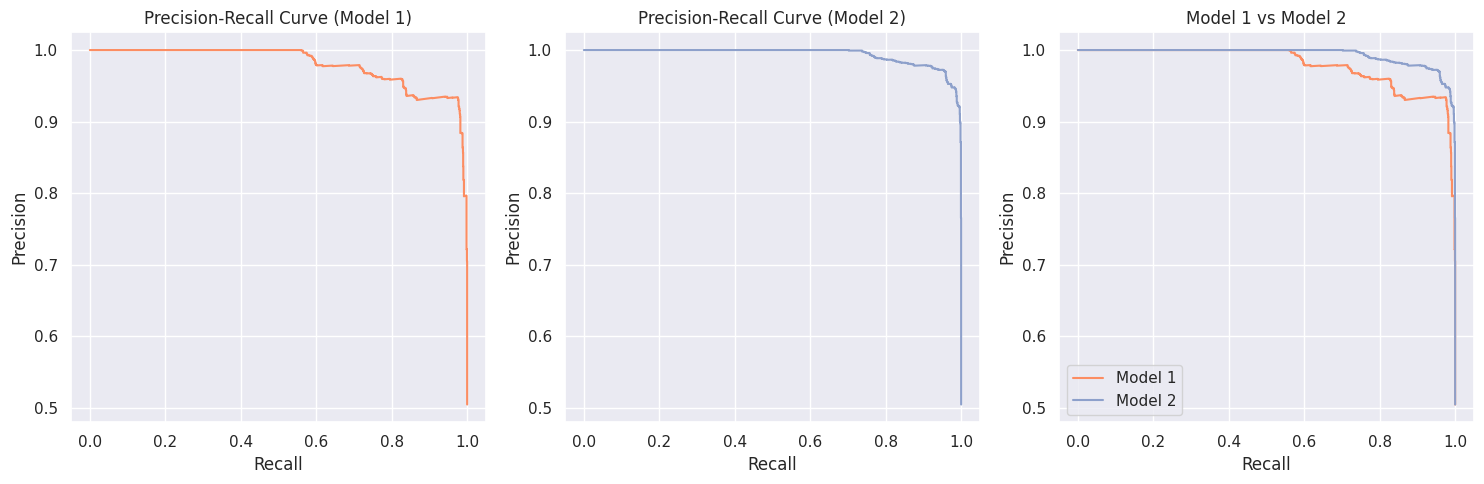

In [ ]:
precision1, recall1, threshold1 = precision_recall_curve(y_test_bc, y_prob_svm1)
precision2, recall2, threshold2 = precision_recall_curve(y_test_bc, y_prob_svm2)

fig, axs = plt.subplots(1, 3, figsize = (15, 5))

axs[0].plot(recall1, precision1, color = colors[1])
axs[0].set_xlabel('Recall')
axs[0].set_ylabel('Precision')
axs[0].set_title('Precision-Recall Curve (Model 1)')

axs[1].plot(recall2, precision2, color = colors[2])
axs[1].set_xlabel('Recall')
axs[1].set_ylabel('Precision')
axs[1].set_title('Precision-Recall Curve (Model 2)')

axs[2].plot(recall1, precision1, color = colors[1], label = 'Model 1')
axs[2].plot(recall2, precision2, color = colors[2], label = 'Model 2')
axs[2].set_xlabel('Recall')
axs[2].set_ylabel('Precision')
axs[2].set_title('Model 1 vs Model 2')
axs[2].legend(loc = 'lower left')

plt.tight_layout()
plt.show()

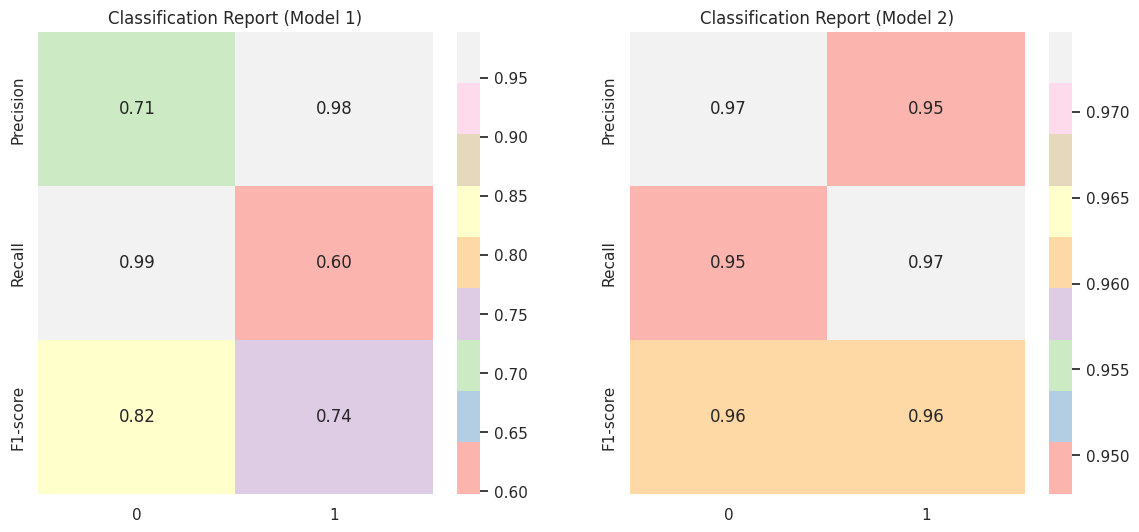

In [ ]:
target_names = svm1.classes_
metrics1 = classification_report(y_true = y_test_bc, y_pred = y_pred_svm1, target_names = target_names, output_dict = True)
precision1 = [metrics1[target_name]['precision'] for target_name in target_names]
recall1 = [metrics1[target_name]['recall'] for target_name in target_names]
f1_score1 = [metrics1[target_name]['f1-score'] for target_name in target_names]

metrics2 = classification_report(y_true = y_test_bc, y_pred = y_pred_svm2, target_names = target_names, output_dict = True)
precision2 = [metrics2[target_name]['precision'] for target_name in target_names]
recall2 = [metrics2[target_name]['recall'] for target_name in target_names]
f1_score2 = [metrics2[target_name]['f1-score'] for target_name in target_names]

data1 = np.array([precision1, recall1, f1_score1])
data2 = np.array([precision2, recall2, f1_score2])
rows = ['Precision', 'Recall', 'F1-score']

fig, axs = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(data1, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[0])
sns.heatmap(data2, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[1])
axs[0].set_title('Classification Report (Model 1)')
axs[1].set_title('Classification Report (Model 2)')
plt.show()

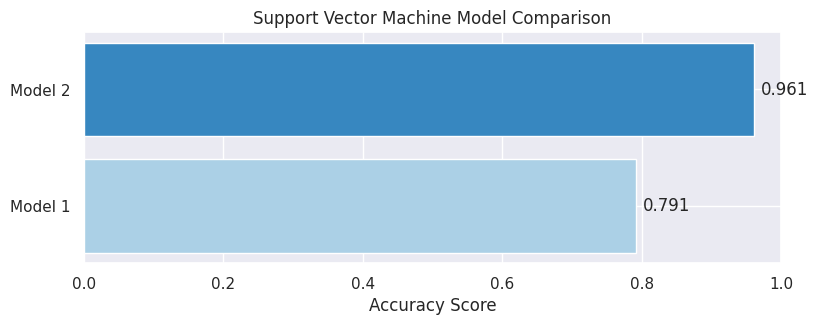

In [ ]:
palette = sns.color_palette('Blues', n_colors = 2)

acc1 = accuracy_score(y_pred_svm1, y_test_bc)
acc2 = accuracy_score(y_pred_svm2, y_test_bc)

labels = ['Model 1', 'Model 2']
scores = [acc1, acc2]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Accuracy Score')
ax.set_title('Support Vector Machine Model Comparison')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

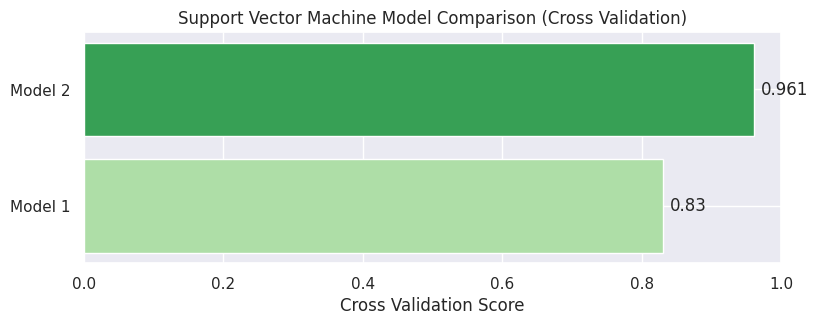

In [ ]:
palette = sns.color_palette('Greens', n_colors = 2)

labels = ['Model 1', 'Model 2']
scores = [cv_svm1.mean(), cv_svm2.mean()]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Cross Validation Score')
ax.set_title('Support Vector Machine Model Comparison (Cross Validation)')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

### Comparison of the Binary Classification Algorithms

We trained two models for each different classification algorithm. For comparing different algorithms, we will take the best performing model from each class based on the model's precision, recall, accuracy, etc.

1. Logistic Regression: Model 2
1. Support Vector Machine: Model 2

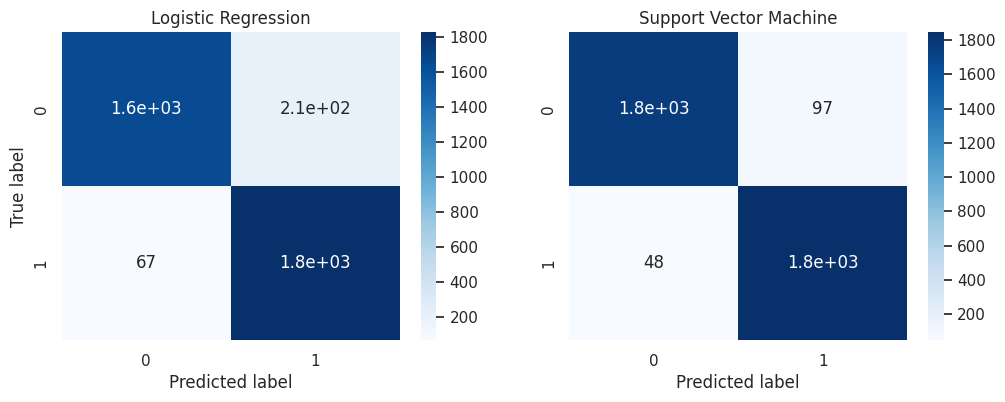

In [ ]:
conf_matrix_model1 = confusion_matrix(y_test_bc, y_pred_lr2)
conf_matrix_model2 = confusion_matrix(y_test_bc, y_pred_svm2)

fig, axs = plt.subplots(1, 2, figsize = (12, 4))

sns.heatmap(conf_matrix_model1, annot = True, cmap = 'Blues', ax = axs[0])
axs[0].set_title('Logistic Regression')

sns.heatmap(conf_matrix_model2, annot = True, cmap = 'Blues', ax = axs[1])
axs[1].set_title('Support Vector Machine')

axs[0].set_xlabel('Predicted label')
axs[0].set_ylabel('True label')
axs[1].set_xlabel('Predicted label')
plt.show()

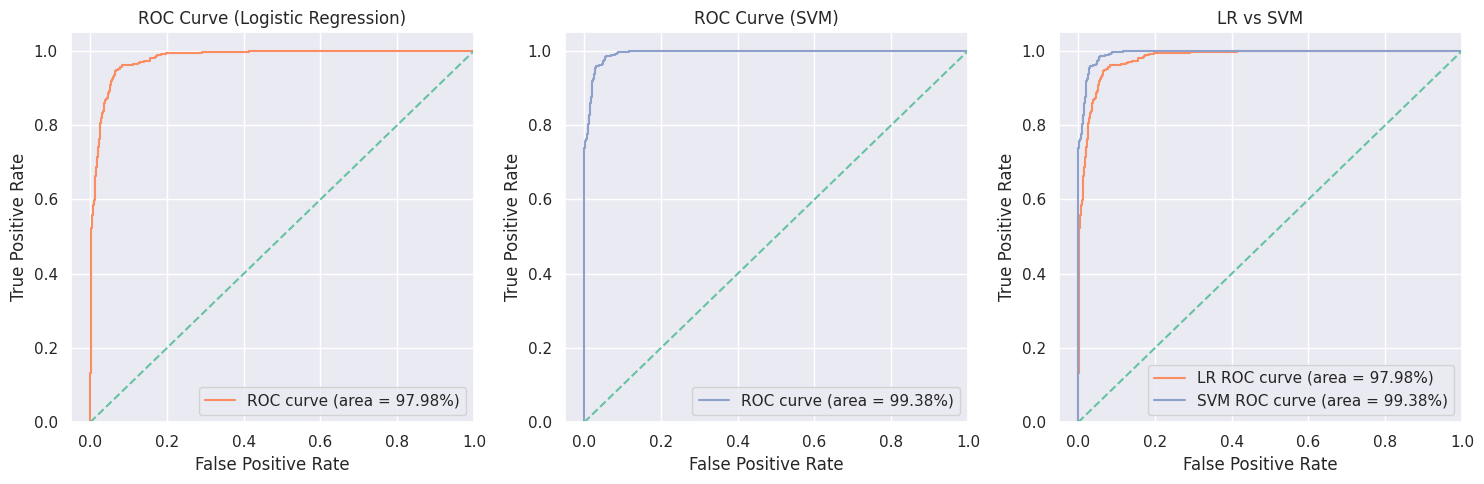

In [ ]:
fpr1, tpr1, _ = roc_curve(y_test_bc, y_prob_lr2)
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(y_test_bc, y_prob_svm2)
roc_auc2 = auc(fpr2, tpr2)

fig, axes = plt.subplots(1, 3, figsize = (15, 5))

axes[0].plot(fpr1, tpr1, label = f'ROC curve (area = {roc_auc1:.2%})', color = colors[1])
axes[0].plot([0, 1], [0, 1], color = colors[0], linestyle = '--')
axes[0].set_xlim([-0.05, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve (Logistic Regression)')
axes[0].legend(loc = 'lower right')

axes[1].plot(fpr2, tpr2, label = f'ROC curve (area = {roc_auc2:.2%})', color = colors[2])
axes[1].plot([0, 1], [0, 1], color = colors[0], linestyle = '--')
axes[1].set_xlim([-0.05, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve (SVM)')
axes[1].legend(loc = 'lower right')

axes[2].plot(fpr1, tpr1, label = f'LR ROC curve (area = {roc_auc1:.2%})', color = colors[1])
axes[2].plot(fpr2, tpr2, label = f'SVM ROC curve (area = {roc_auc2:.2%})', color = colors[2])
axes[2].plot([0, 1], [0, 1], color = colors[0], linestyle = '--')
axes[2].set_xlim([-0.05, 1.0])
axes[2].set_ylim([0.0, 1.05])
axes[2].set_xlabel('False Positive Rate')
axes[2].set_ylabel('True Positive Rate')
axes[2].set_title('LR vs SVM')
axes[2].legend(loc = 'lower right')

plt.tight_layout()
plt.show()

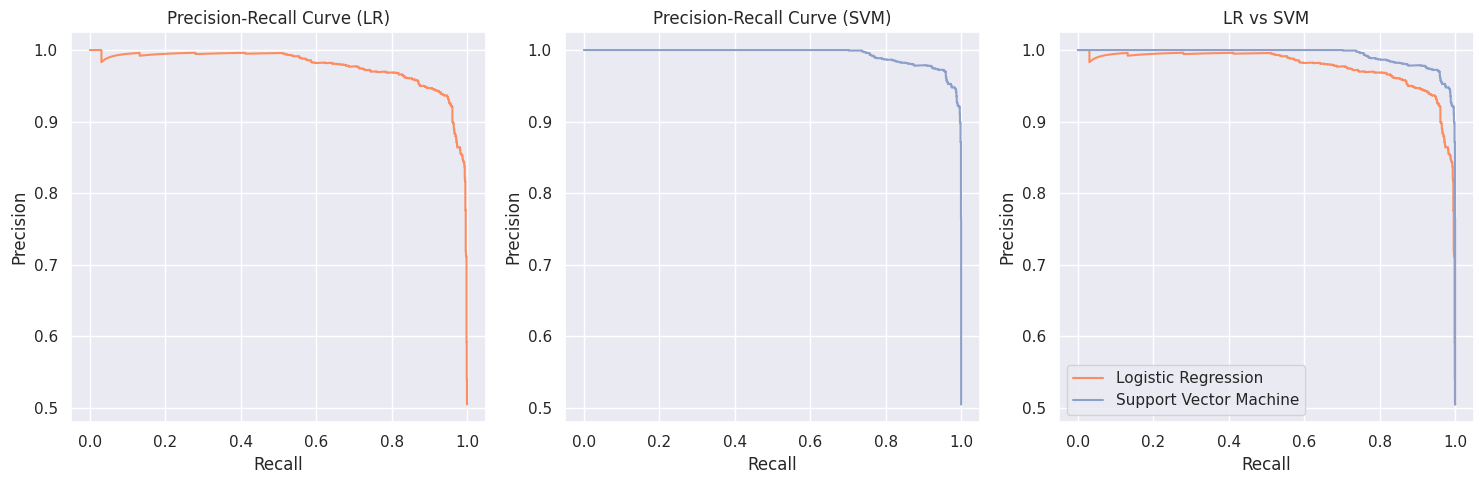

In [ ]:
precision1, recall1, threshold1 = precision_recall_curve(y_test_bc, y_prob_lr2)
precision2, recall2, threshold2 = precision_recall_curve(y_test_bc, y_prob_svm2)

fig, axs = plt.subplots(1, 3, figsize = (15, 5))

axs[0].plot(recall1, precision1, color = colors[1], label = 'Model 1')
axs[0].set_xlabel('Recall')
axs[0].set_ylabel('Precision')
axs[0].set_title('Precision-Recall Curve (LR)')

axs[1].plot(recall2, precision2, color = colors[2], label = 'Model 2')
axs[1].set_xlabel('Recall')
axs[1].set_ylabel('Precision')
axs[1].set_title('Precision-Recall Curve (SVM)')

axs[2].plot(recall1, precision1, color = colors[1], label = 'Logistic Regression')
axs[2].plot(recall2, precision2, color = colors[2], label = 'Support Vector Machine')
axs[2].set_xlabel('Recall')
axs[2].set_ylabel('Precision')
axs[2].set_title('LR vs SVM')
axs[2].legend(loc = 'lower left')

plt.tight_layout()
plt.show()

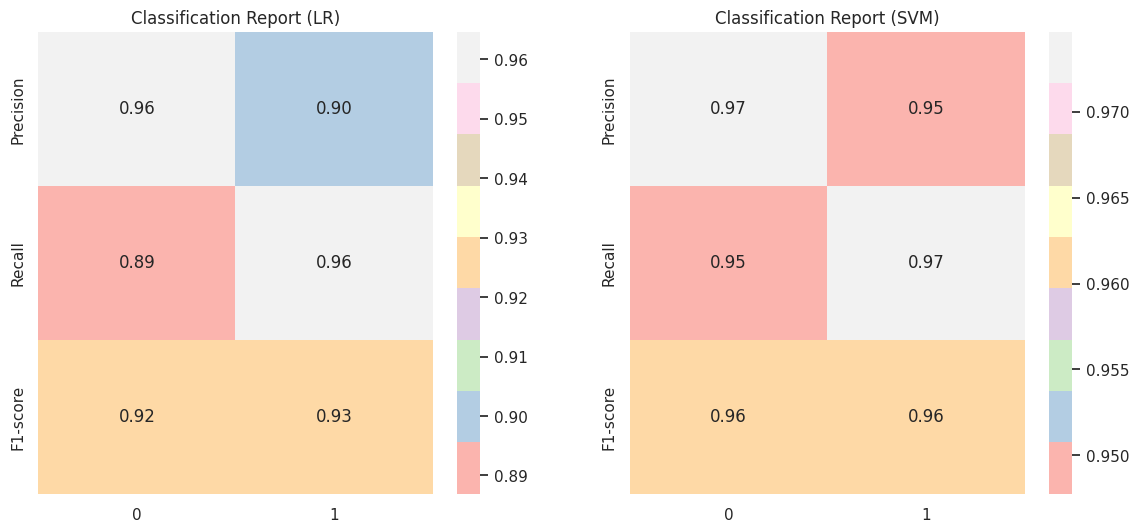

In [ ]:
target_names = svm2.classes_
metrics1 = classification_report(y_true = y_test_bc, y_pred = y_pred_lr2, target_names = target_names, output_dict = True)
precision1 = [metrics1[target_name]['precision'] for target_name in target_names]
recall1 = [metrics1[target_name]['recall'] for target_name in target_names]
f1_score1 = [metrics1[target_name]['f1-score'] for target_name in target_names]

metrics2 = classification_report(y_true = y_test_bc, y_pred = y_pred_svm2, target_names = target_names, output_dict = True)
precision2 = [metrics2[target_name]['precision'] for target_name in target_names]
recall2 = [metrics2[target_name]['recall'] for target_name in target_names]
f1_score2 = [metrics2[target_name]['f1-score'] for target_name in target_names]

data1 = np.array([precision1, recall1, f1_score1])
data2 = np.array([precision2, recall2, f1_score2])
rows = ['Precision', 'Recall', 'F1-score']

fig, axs = plt.subplots(1, 2, figsize = (14, 6))
sns.heatmap(data1, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax=axs[0])
sns.heatmap(data2, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax=axs[1])
axs[0].set_title('Classification Report (LR)')
axs[1].set_title('Classification Report (SVM)')
plt.show()

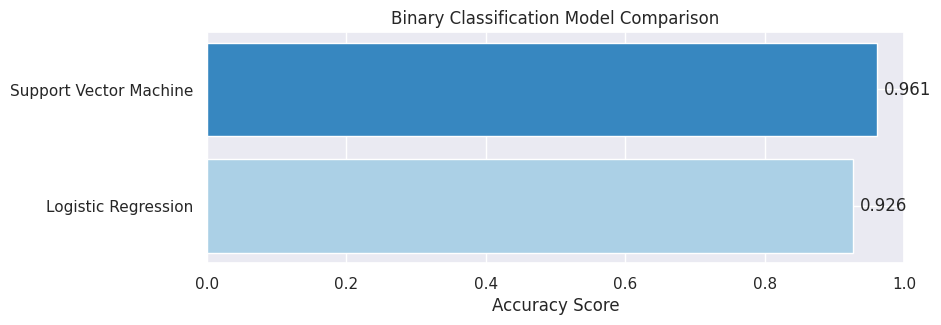

In [ ]:
palette = sns.color_palette('Blues', n_colors = 2)

acc1 = accuracy_score(y_pred_lr2, y_test_bc)
acc2 = accuracy_score(y_pred_svm2, y_test_bc)

labels = ['Logistic Regression', 'Support Vector Machine']
scores = [acc1, acc2]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Accuracy Score')
ax.set_title('Binary Classification Model Comparison')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

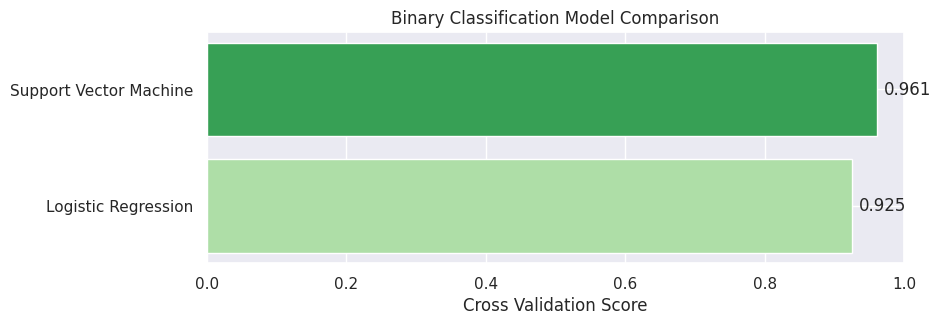

In [ ]:
palette = sns.color_palette('Greens', n_colors = 2)

labels = ['Logistic Regression', 'Support Vector Machine']
scores = [cv_lr2.mean(), cv_svm2.mean()]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Cross Validation Score')
ax.set_title('Binary Classification Model Comparison')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

### Random Forest Models Comparison

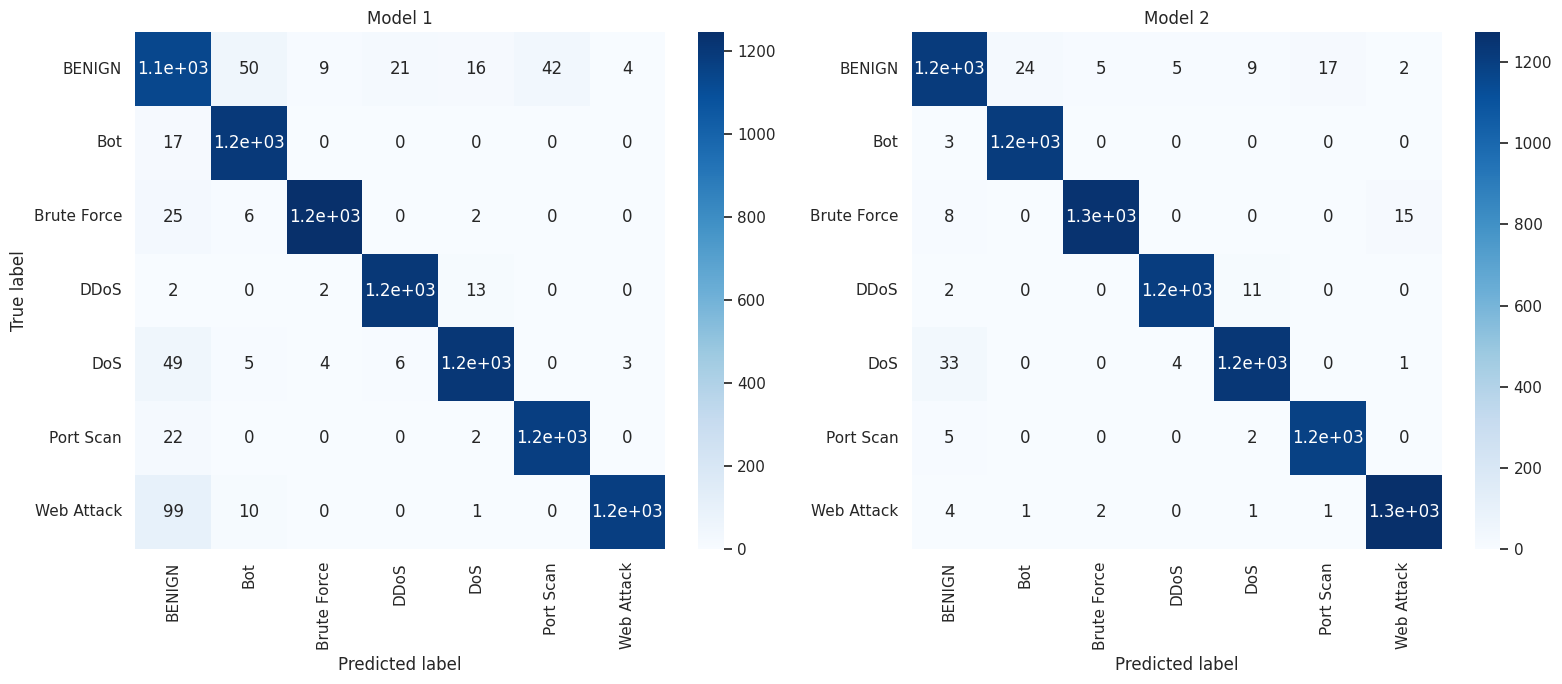

In [ ]:
y_pred_rf1 = rf1.predict(X_test)
y_pred_rf2 = rf2.predict(X_test)

conf_matrix_model1 = confusion_matrix(y_test, y_pred_rf1)
conf_matrix_model2 = confusion_matrix(y_test, y_pred_rf2)

fig, axs = plt.subplots(1, 2, figsize = (16, 7))

sns.heatmap(conf_matrix_model1, annot = True, cmap = 'Blues', ax = axs[0], xticklabels = rf1.classes_, yticklabels = rf1.classes_)
axs[0].set_title('Model 1')

sns.heatmap(conf_matrix_model2, annot = True, cmap = 'Blues', ax = axs[1], xticklabels = rf2.classes_, yticklabels = rf2.classes_)
axs[1].set_title('Model 2')

axs[0].set_xlabel('Predicted label')
axs[0].set_ylabel('True label')
axs[1].set_xlabel('Predicted label')

fig.tight_layout()
plt.show()

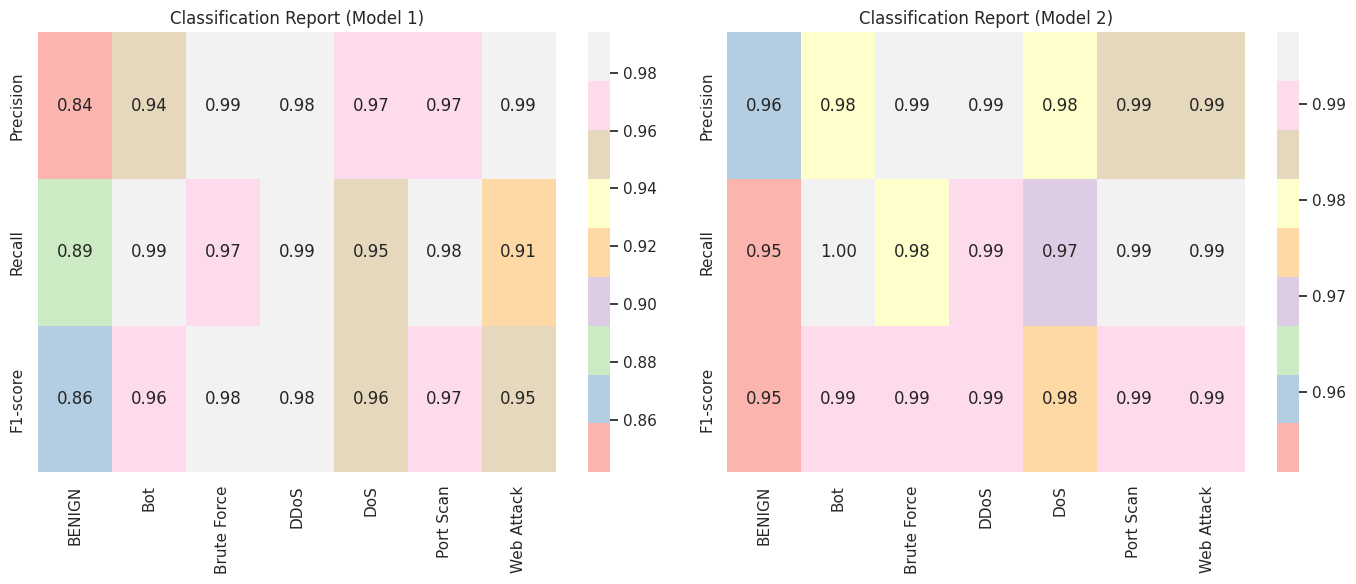

In [ ]:
target_names = rf1.classes_
metrics1 = classification_report(y_true = y_test, y_pred = y_pred_rf1, target_names = target_names, output_dict = True)
precision1 = [metrics1[target_name]['precision'] for target_name in target_names]
recall1 = [metrics1[target_name]['recall'] for target_name in target_names]
f1_score1 = [metrics1[target_name]['f1-score'] for target_name in target_names]

metrics2 = classification_report(y_true = y_test, y_pred = y_pred_rf2, target_names = target_names, output_dict = True)
precision2 = [metrics2[target_name]['precision'] for target_name in target_names]
recall2 = [metrics2[target_name]['recall'] for target_name in target_names]
f1_score2 = [metrics2[target_name]['f1-score'] for target_name in target_names]

data1 = np.array([precision1, recall1, f1_score1])
data2 = np.array([precision2, recall2, f1_score2])
rows = ['Precision', 'Recall', 'F1-score']

fig, axs = plt.subplots(1, 2, figsize = (14, 6))
sns.heatmap(data1, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[0])
sns.heatmap(data2, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[1])
axs[0].set_title('Classification Report (Model 1)')
axs[1].set_title('Classification Report (Model 2)')
fig.tight_layout()
plt.show()

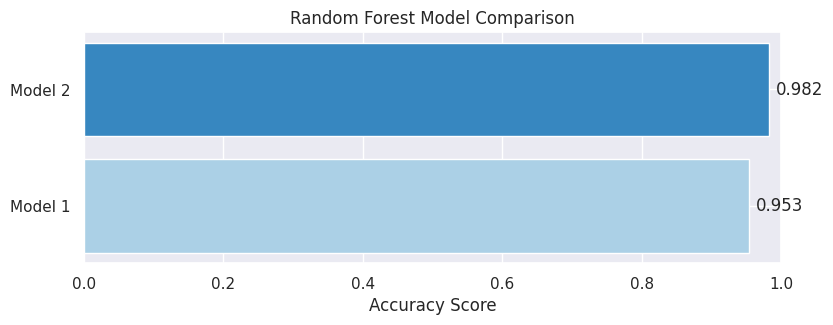

In [ ]:
palette = sns.color_palette('Blues', n_colors = 2)

acc1 = accuracy_score(y_pred_rf1, y_test)
acc2 = accuracy_score(y_pred_rf2, y_test)

labels = ['Model 1', 'Model 2']
scores = [acc1, acc2]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Accuracy Score')
ax.set_title('Random Forest Model Comparison')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

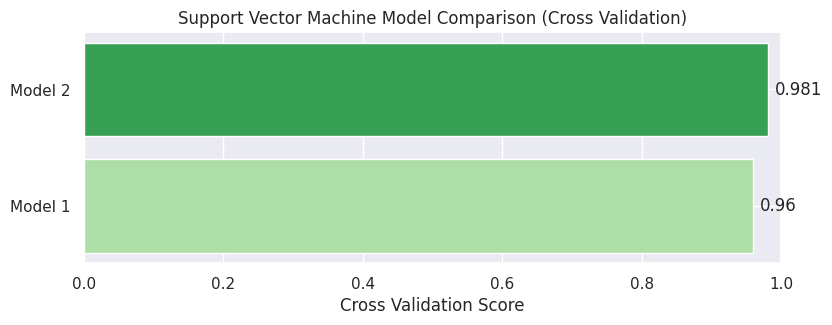

In [ ]:
palette = sns.color_palette('Greens', n_colors = 2)

labels = ['Model 1', 'Model 2']
scores = [cv_rf1.mean(), cv_rf2.mean()]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Cross Validation Score')
ax.set_title('Support Vector Machine Model Comparison (Cross Validation)')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

### Decision Trees Models Comparison

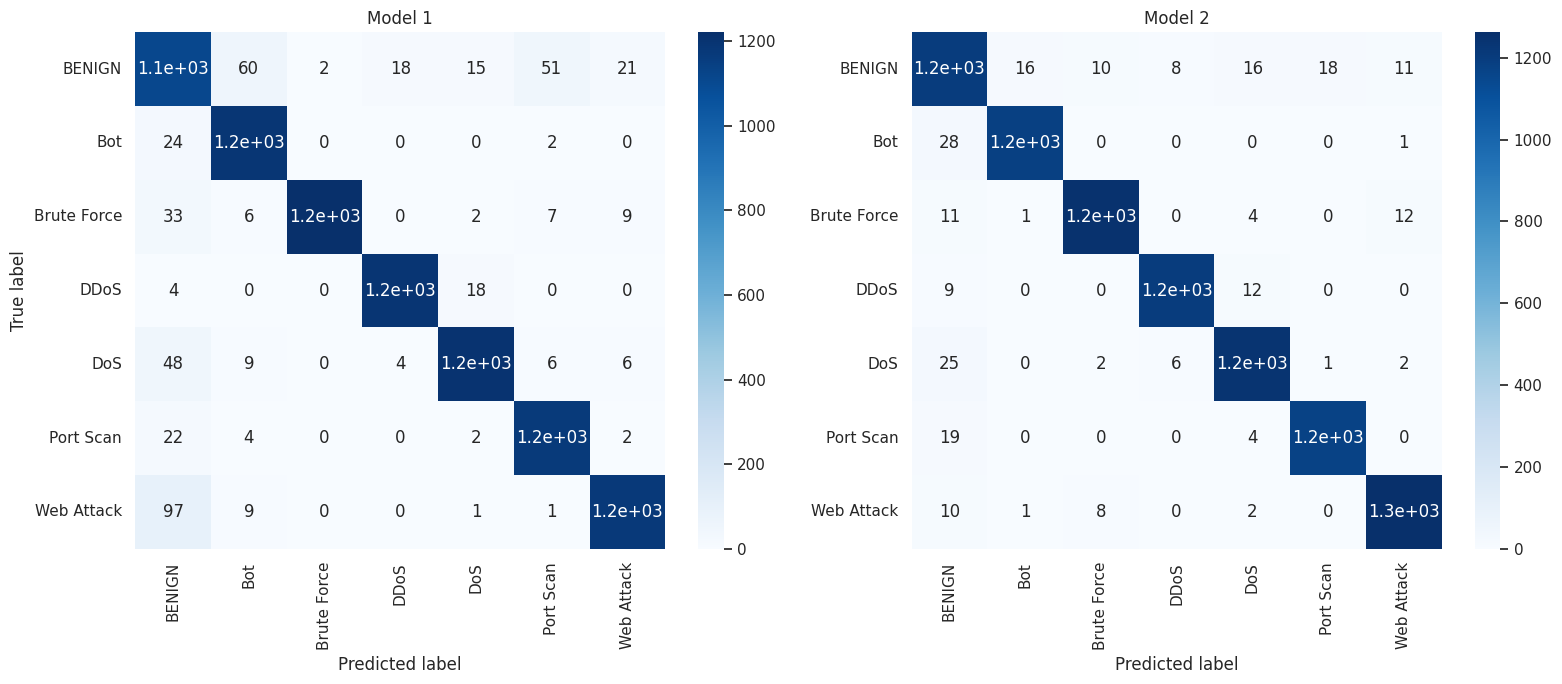

In [ ]:
y_pred_dt1 = dt1.predict(X_test)
y_pred_dt2 = dt2.predict(X_test)

conf_matrix_model1 = confusion_matrix(y_test, y_pred_dt1)
conf_matrix_model2 = confusion_matrix(y_test, y_pred_dt2)

fig, axs = plt.subplots(1, 2, figsize = (16, 7))

sns.heatmap(conf_matrix_model1, annot = True, cmap = 'Blues', ax = axs[0], xticklabels = dt1.classes_, yticklabels = dt1.classes_)
axs[0].set_title('Model 1')

sns.heatmap(conf_matrix_model2, annot = True, cmap = 'Blues', ax = axs[1], xticklabels = dt2.classes_, yticklabels = dt2.classes_)
axs[1].set_title('Model 2')

axs[0].set_xlabel('Predicted label')
axs[0].set_ylabel('True label')
axs[1].set_xlabel('Predicted label')

fig.tight_layout()
plt.show()

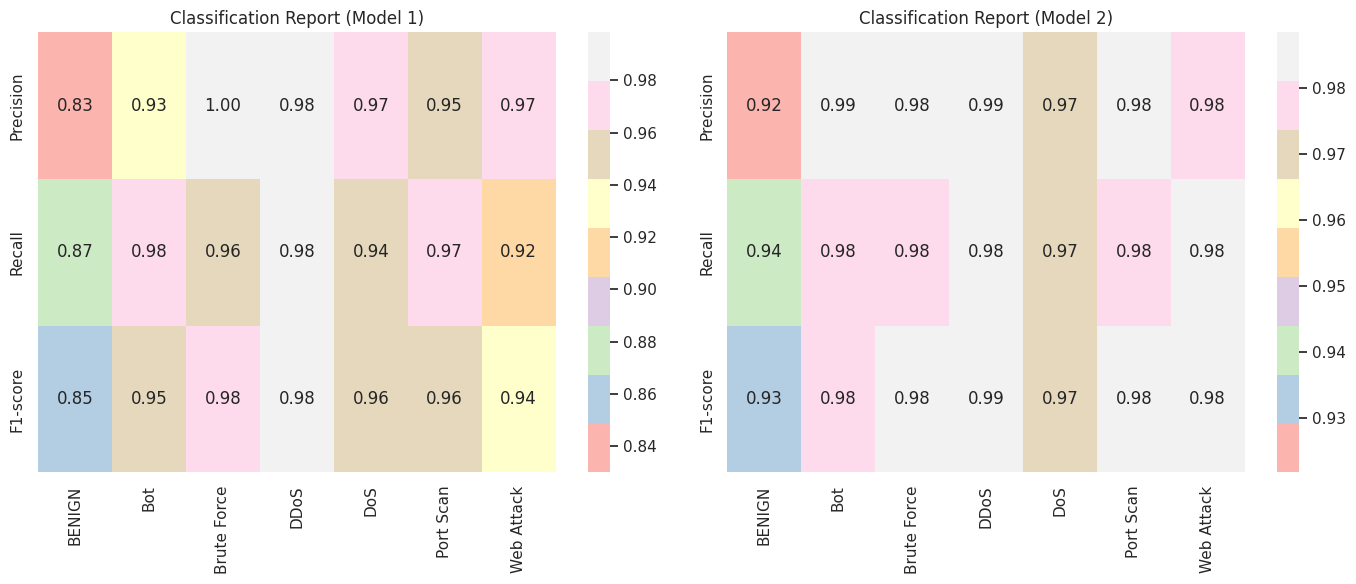

In [ ]:
target_names = dt1.classes_
metrics1 = classification_report(y_true = y_test, y_pred = y_pred_dt1, target_names = target_names, output_dict = True)
precision1 = [metrics1[target_name]['precision'] for target_name in target_names]
recall1 = [metrics1[target_name]['recall'] for target_name in target_names]
f1_score1 = [metrics1[target_name]['f1-score'] for target_name in target_names]

metrics2 = classification_report(y_true = y_test, y_pred = y_pred_dt2, target_names = target_names, output_dict = True)
precision2 = [metrics2[target_name]['precision'] for target_name in target_names]
recall2 = [metrics2[target_name]['recall'] for target_name in target_names]
f1_score2 = [metrics2[target_name]['f1-score'] for target_name in target_names]

data1 = np.array([precision1, recall1, f1_score1])
data2 = np.array([precision2, recall2, f1_score2])
rows = ['Precision', 'Recall', 'F1-score']

fig, axs = plt.subplots(1, 2, figsize = (14, 6))
sns.heatmap(data1, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[0])
sns.heatmap(data2, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[1])
axs[0].set_title('Classification Report (Model 1)')
axs[1].set_title('Classification Report (Model 2)')
fig.tight_layout()
plt.show()

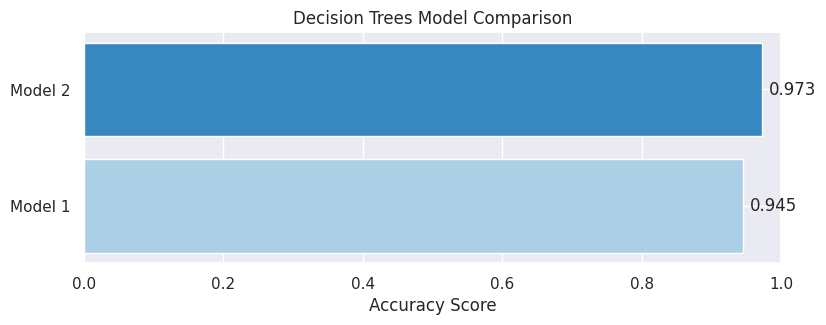

In [ ]:
palette = sns.color_palette('Blues', n_colors = 2)

acc1 = accuracy_score(y_pred_dt1, y_test)
acc2 = accuracy_score(y_pred_dt2, y_test)

labels = ['Model 1', 'Model 2']
scores = [acc1, acc2]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Accuracy Score')
ax.set_title('Decision Trees Model Comparison')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

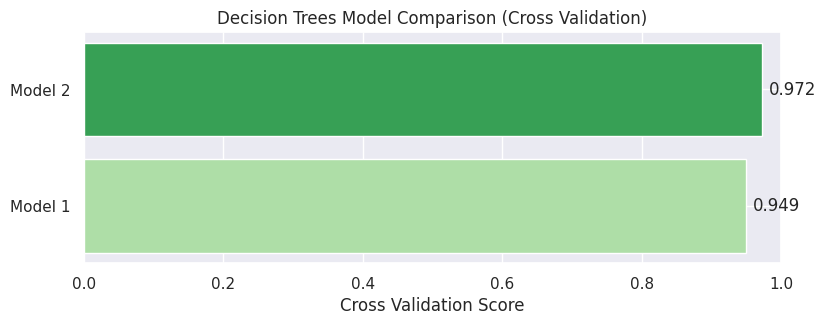

In [ ]:
palette = sns.color_palette('Greens', n_colors = 2)

labels = ['Model 1', 'Model 2']
scores = [cv_dt1.mean(), cv_dt2.mean()]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Cross Validation Score')
ax.set_title('Decision Trees Model Comparison (Cross Validation)')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

### K Nearest Neighbours Models Comparison

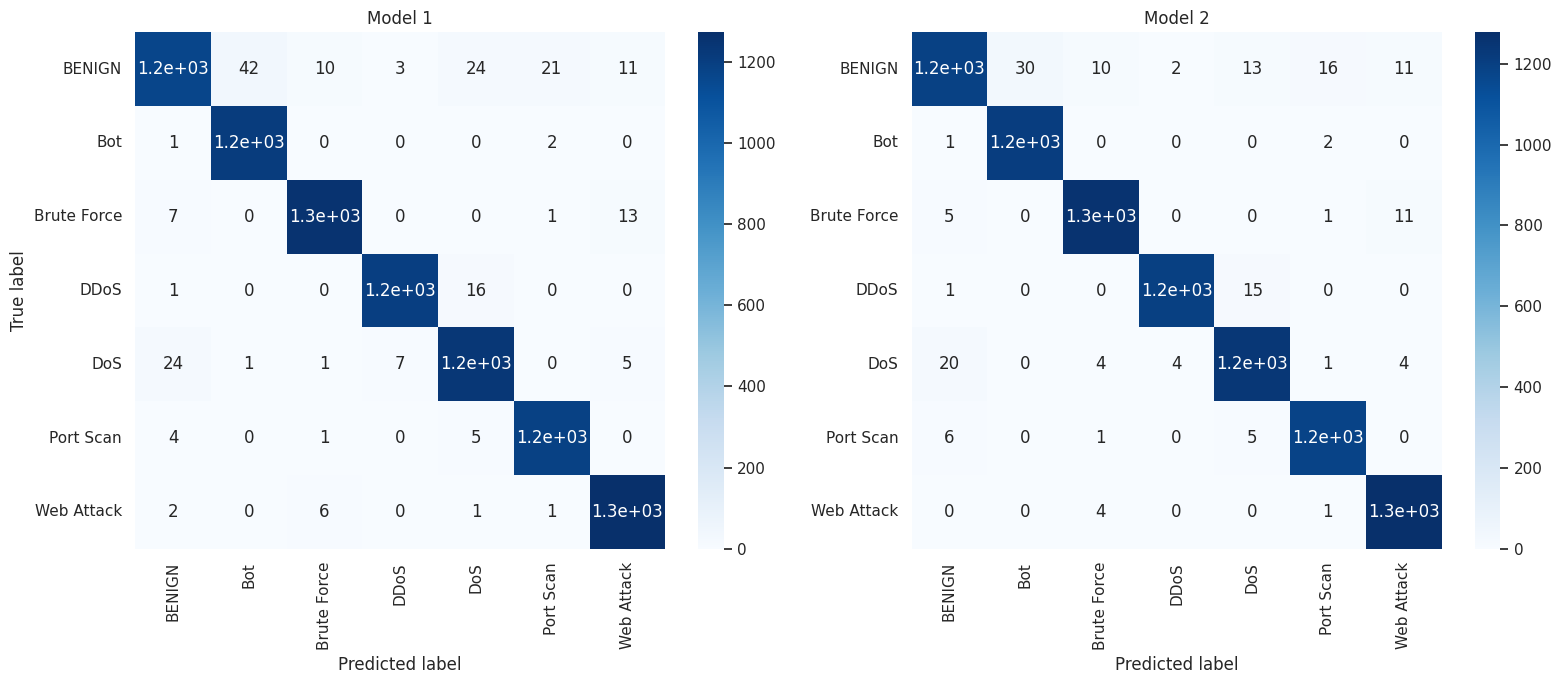

In [ ]:
y_pred_knn1 = knn1.predict(X_test)
y_pred_knn2 = knn2.predict(X_test)

conf_matrix_model1 = confusion_matrix(y_test, y_pred_knn1)
conf_matrix_model2 = confusion_matrix(y_test, y_pred_knn2)

fig, axs = plt.subplots(1, 2, figsize = (16, 7))

sns.heatmap(conf_matrix_model1, annot = True, cmap = 'Blues', ax = axs[0], xticklabels = knn1.classes_, yticklabels = knn1.classes_)
axs[0].set_title('Model 1')

sns.heatmap(conf_matrix_model2, annot = True, cmap = 'Blues', ax = axs[1], xticklabels = knn2.classes_, yticklabels = knn2.classes_)
axs[1].set_title('Model 2')

axs[0].set_xlabel('Predicted label')
axs[0].set_ylabel('True label')
axs[1].set_xlabel('Predicted label')

fig.tight_layout()
plt.show()

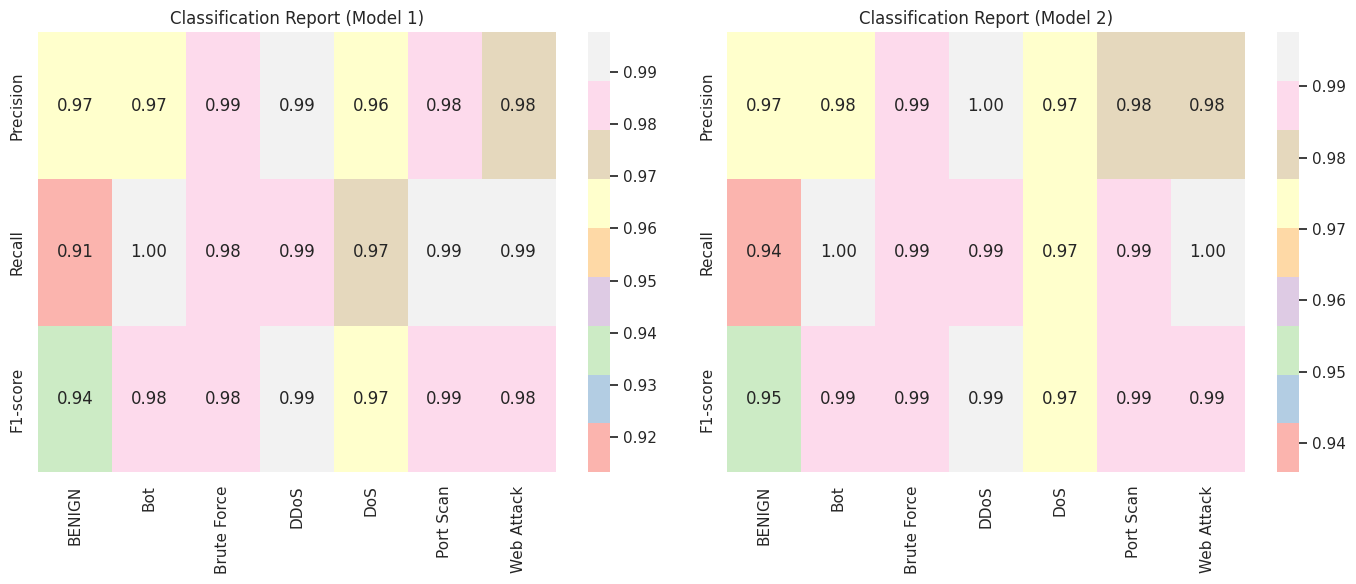

In [ ]:
target_names = knn1.classes_
metrics1 = classification_report(y_true = y_test, y_pred = y_pred_knn1, target_names = target_names, output_dict = True)
precision1 = [metrics1[target_name]['precision'] for target_name in target_names]
recall1 = [metrics1[target_name]['recall'] for target_name in target_names]
f1_score1 = [metrics1[target_name]['f1-score'] for target_name in target_names]

metrics2 = classification_report(y_true = y_test, y_pred = y_pred_knn2, target_names = target_names, output_dict = True)
precision2 = [metrics2[target_name]['precision'] for target_name in target_names]
recall2 = [metrics2[target_name]['recall'] for target_name in target_names]
f1_score2 = [metrics2[target_name]['f1-score'] for target_name in target_names]

data1 = np.array([precision1, recall1, f1_score1])
data2 = np.array([precision2, recall2, f1_score2])
rows = ['Precision', 'Recall', 'F1-score']

fig, axs = plt.subplots(1, 2, figsize = (14, 6))
sns.heatmap(data1, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[0])
sns.heatmap(data2, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[1])
axs[0].set_title('Classification Report (Model 1)')
axs[1].set_title('Classification Report (Model 2)')
fig.tight_layout()
plt.show()

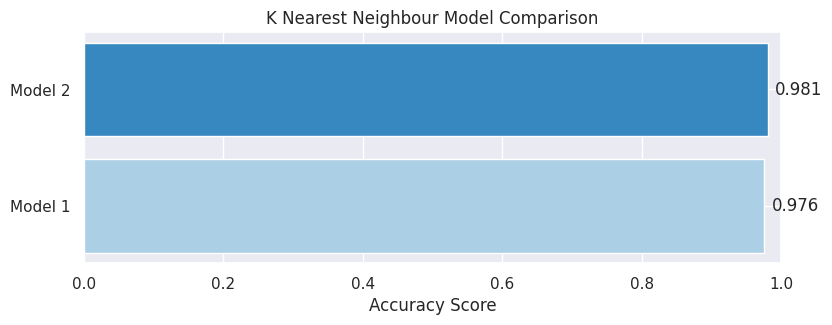

In [ ]:
palette = sns.color_palette('Blues', n_colors = 2)

acc1 = accuracy_score(y_pred_knn1, y_test)
acc2 = accuracy_score(y_pred_knn2, y_test)

labels = ['Model 1', 'Model 2']
scores = [acc1, acc2]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Accuracy Score')
ax.set_title('K Nearest Neighbour Model Comparison')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

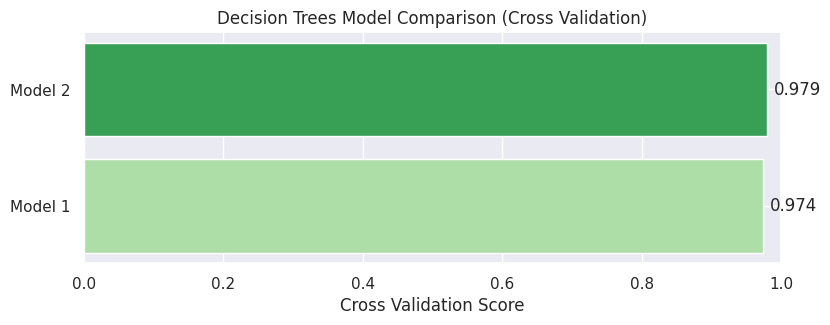

In [ ]:
palette = sns.color_palette('Greens', n_colors = 2)

labels = ['Model 1', 'Model 2']
scores = [cv_knn1.mean(), cv_knn2.mean()]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Cross Validation Score')
ax.set_title('Decision Trees Model Comparison (Cross Validation)')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

### Comparison of the Multi-class Classification Algorithms

We trained two models for each different classification algorithm. For comparing different algorithms, we will take the best performing model from each class based on the model's precision, recall, accuracy, etc.

1. Random Forest: Model 2
1. Decision Trees: Model 2
1. KNN: Model 2

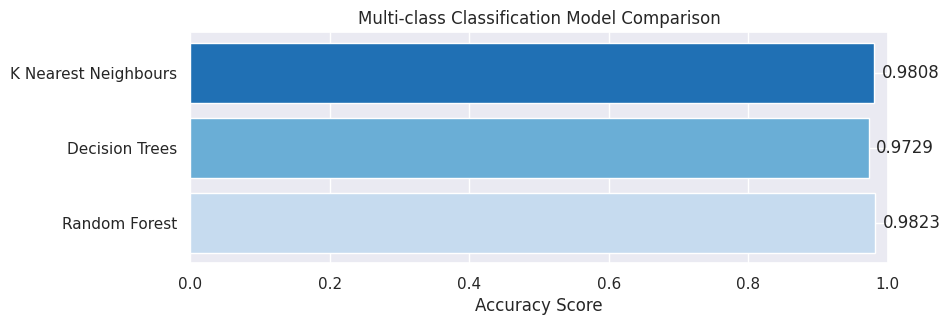

In [ ]:
palette = sns.color_palette('Blues', n_colors = 3)

rf_acc = accuracy_score(y_pred_rf2, y_test)
dt_acc = accuracy_score(y_pred_dt2, y_test)
knn_acc = accuracy_score(y_pred_knn2, y_test)

labels = ['Random Forest', 'Decision Trees', 'K Nearest Neighbours']
scores = [rf_acc, dt_acc, knn_acc]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Accuracy Score')
ax.set_title('Multi-class Classification Model Comparison')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 4)), ha = 'left', va = 'center')

plt.show()

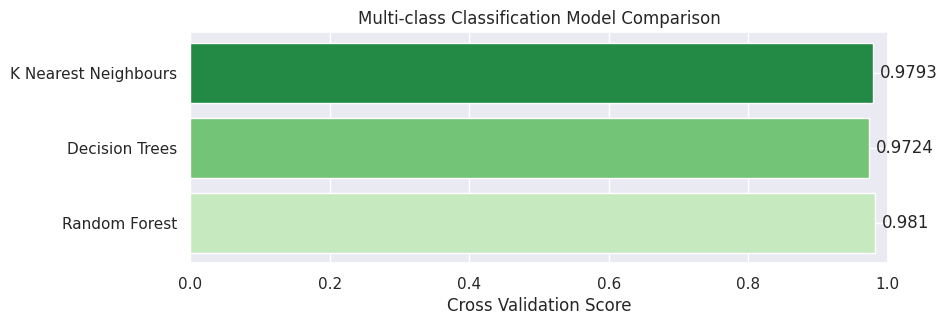

In [ ]:
palette = sns.color_palette('Greens', n_colors = 3)

labels = ['Random Forest', 'Decision Trees', 'K Nearest Neighbours']
scores = [cv_rf2.mean(), cv_dt2.mean(), cv_knn2.mean()]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Cross Validation Score')
ax.set_title('Multi-class Classification Model Comparison')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 4)), ha = 'left', va = 'center')

plt.show()

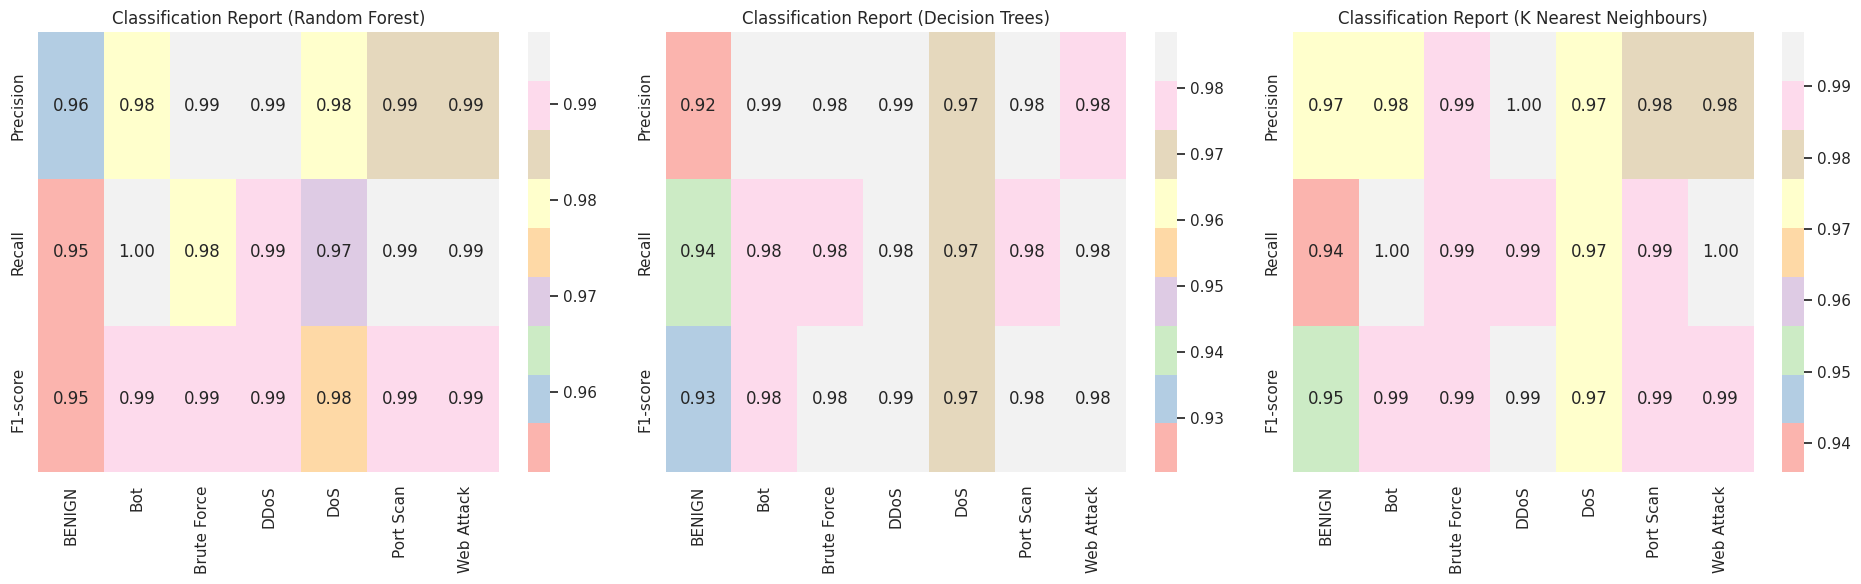

In [ ]:
target_names = rf2.classes_
preds = [y_pred_rf2, y_pred_dt2, y_pred_knn2]

datas = []
for pred in preds:
    metrics = classification_report(y_true = y_test, y_pred = pred, target_names = target_names, output_dict = True)
    precision = [metrics[target_name]['precision'] for target_name in target_names]
    recall = [metrics[target_name]['recall'] for target_name in target_names]
    f1_score = [metrics[target_name]['f1-score'] for target_name in target_names]

    datas.append(np.array([precision, recall, f1_score]))

rows = ['Precision', 'Recall', 'F1-score']

fig, axs = plt.subplots(1, 3, figsize = (19, 6))
sns.heatmap(datas[0], cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[0])
sns.heatmap(datas[1], cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[1])
sns.heatmap(datas[2], cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[2])

axs[0].set_title('Classification Report (Random Forest)')
axs[1].set_title('Classification Report (Decision Trees)')
axs[2].set_title('Classification Report (K Nearest Neighbours)')
fig.tight_layout()
plt.show()

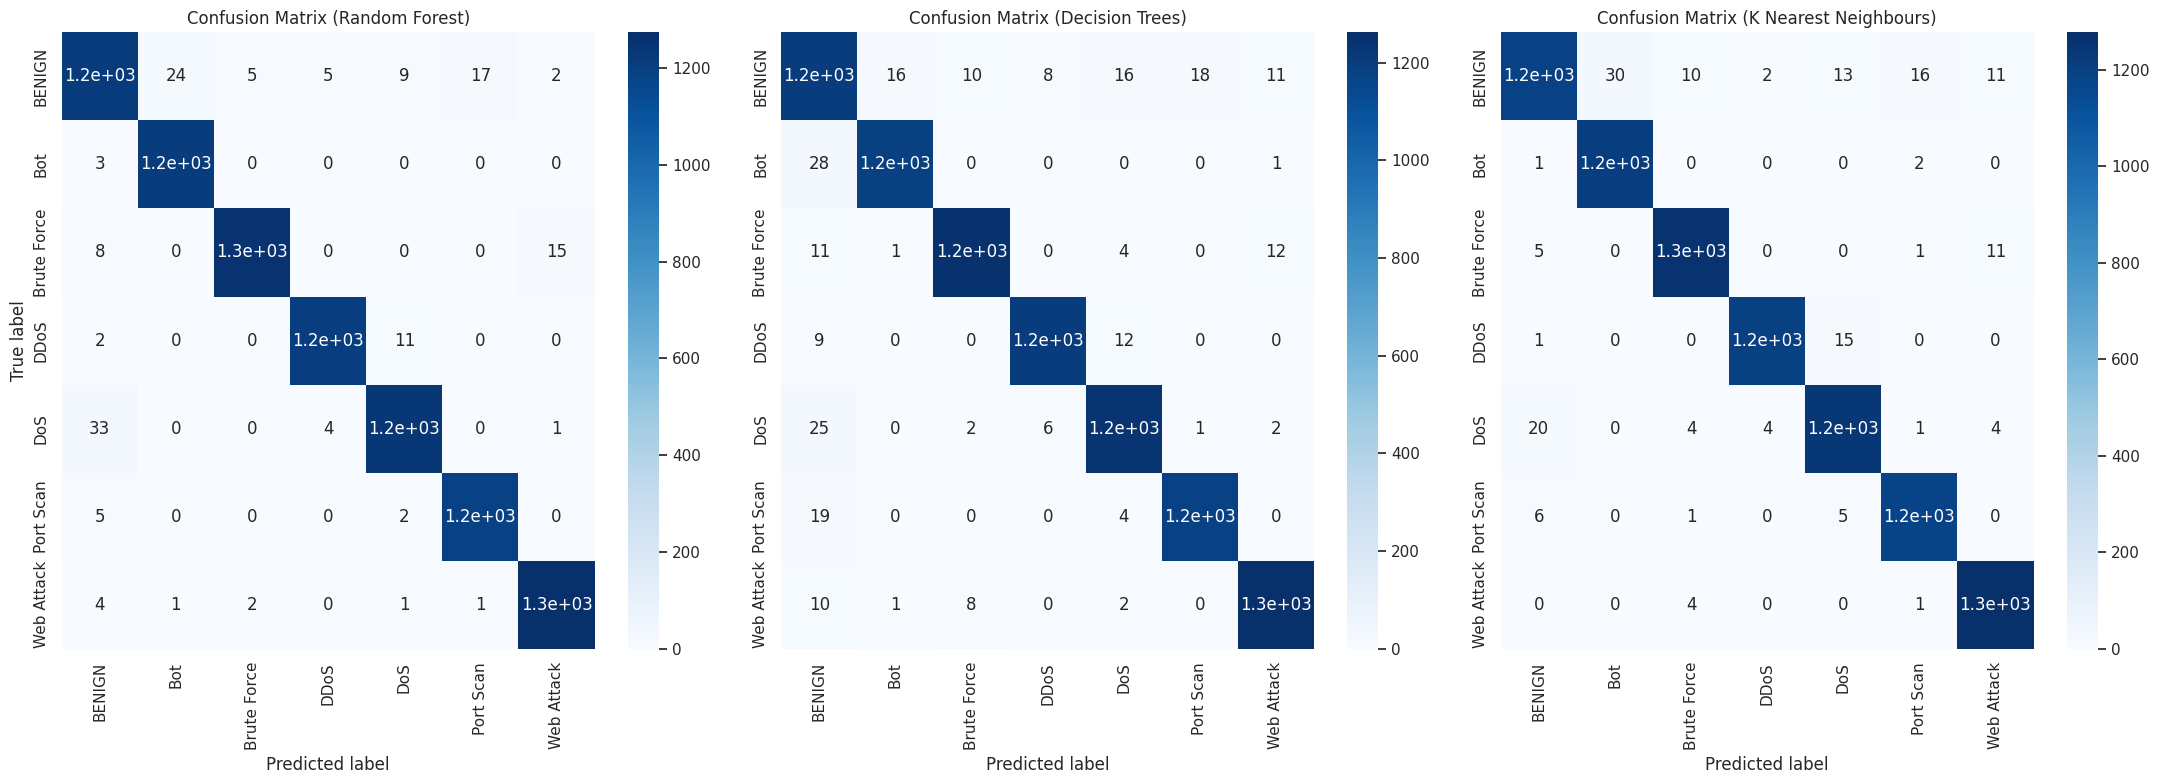

In [ ]:
preds = [y_pred_rf2, y_pred_dt2, y_pred_knn2]

conf_matrix = [confusion_matrix(y_test, y_pred) for y_pred in preds]

fig, axs = plt.subplots(1, 3, figsize = (22, 8))

sns.heatmap(conf_matrix[0], annot = True, cmap = 'Blues', ax = axs[0], xticklabels = dt1.classes_, yticklabels = dt1.classes_)
sns.heatmap(conf_matrix[1], annot = True, cmap = 'Blues', ax = axs[1], xticklabels = dt1.classes_, yticklabels = dt1.classes_)
sns.heatmap(conf_matrix[2], annot = True, cmap = 'Blues', ax = axs[2], xticklabels = dt1.classes_, yticklabels = dt1.classes_)

axs[0].set_title('Confusion Matrix (Random Forest)')
axs[1].set_title('Confusion Matrix (Decision Trees)')
axs[2].set_title('Confusion Matrix (K Nearest Neighbours)')

axs[0].set_xlabel('Predicted label')
axs[1].set_xlabel('Predicted label')
axs[2].set_xlabel('Predicted label')
axs[0].set_ylabel('True label')

fig.tight_layout()
plt.show()

During the training phase of various classification algorithms, we trained two models for each of the algorithm using different parameters.


***Binary Classification Algorithms:***
1. Logistic Regression
2. Support Vector Machine

For comapring different classification algorithms, we took the best performing models from each algorithms.

Based on our various tests, we found out that logistic Regression can handle large size data and can be trained in a very short amount of time. However, the drawback is less accurate models. On the other hand, SVM is quite computationally expensive and takes a hefty amount of time to train. but the good thing is the accuracy score is much higher than the logistic regression models. We tuned a few parameters here and there to improve the models' accuracy. We also did cross-validation to make sure that our model was not overfitted and was trained just right.

One other thing to mention is that the accuracy of the models is dependent on the standardization of the dataset. We trained our model with and without the use of a standard scaler. During our testing different models, we found out that the accuracy and other performance measure scores went significantly high after standardizing the dataset. So, we chose to standardize data before applying PCA.


***Multi-class Classification Algorithms:***
1. Random Forest
2. Decision Trees
3. K Nearest Neighbours

Again, for comapring different classification algorithms, we took the best performing models from each of the 3 algorithms.

The time taken to train the multi-class classification models is relatively lower than the binary classification models. This could be due to the fact that the train data size is smaller than the binary classification train data.

As shown above in the analysis section, the dataset is highly imbalanced. In order to keep the data balanced over all classes, we first took most number of samples from the minority classes and sufficient number of sample from the majority clasees. Later we used SMOTE (Synthetic Minority Over-sampling Technique) to create an overall balanced dataset for training the multi-class classification models.

By comparing the performance metrics of the models, we see that Random Forest is the best performing model followed by KNN and Decision Tree. From the confusion matrix and the classification report, the dominance of Random Forest in terms of precision, recall, and f1-score is evident. The reason Decision Tree falling behind is that it is not always expressive enough to capture complex relationships between the input features and the target variable. Decision Tree may struggle with problems where the target variable depends on a combination of input features rather than just one or two features. KNN and Random Forest can handle more complex relationships between the input features and the target variable by using more flexible models. Also, we used relatively fewer parameters to tune the Decision Tree models. Just like the binary classification algorithms, we also cross-validated the multi-class classification models to make sure they were not overfitted.


**Future Work:** Keeping this in mind, we have to choose our model accordingly if we want to stick with one. However, In this case, we can also combine the KNN and Random Forest classifiers using an ensemble method. This can improve the accuracy of our intrusion detection system by leveraging the strengths of both models and reducing the risk of overfitting. The ensemble method would allow the models to work together to produce a more robust prediction, which could be more effective at identifying different types of network attack.
